# AML_Assignment_2_Question_1
Aniket Santra(MDS202106)\
Avik Das(MDS202112)\
Meghna Mondal(MDS202123)

In [2]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
# Convert vector to image
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x


# Display images, n=max number of images to show
def display_images(in_raw, out_raw, n=1):
    out_raw = out_raw[:n]
    if in_raw is not None:
        in_raw = in_raw[:n]
        in_pic = to_img(in_raw.cpu().data).view(-1, 28, 28)
        plt.figure(figsize=(18, 6))
        for i in range(n):
            plt.subplot(1,n,i+1)
            plt.imshow(in_pic[i], cmap = "gray")
            plt.axis('off')
    out_pic = to_img(out_raw.cpu().data).view(-1, 28, 28)
    plt.figure(figsize=(18, 6))
    for i in range(n):   
        plt.subplot(1,n,i+1)
        plt.imshow(out_pic[i], cmap = "gray")
        plt.axis('off')
    plt.show()

# Data Loaders

In [4]:
# Define data loading step

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=True, download=True, transform=img_transform),
    batch_size=256, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=False, transform=img_transform),
    batch_size=32, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



# The VAE model

In [5]:
class VAE(nn.Module):
    def __init__(self, d=50):
        super().__init__()
        self.d = d #latent dimension
        
        self.encoder = nn.Sequential(
            nn.Linear(784, d ** 2),
            nn.ReLU(),
            nn.Linear(d ** 2, d * 2) # we have mean and variance, each is d-dim vector
        )

        self.decoder = nn.Sequential(
            nn.Linear(d, d ** 2),
            nn.ReLU(),
            nn.Linear(d ** 2, 784),
            nn.Tanh()
        )

    def sampler(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = std.new_empty(std.size()).normal_()
            return eps.mul_(std).add_(mu)
        else:
            return mu

    def forward(self, x):
        mu_logvar = self.encoder(x.view(-1, 784)).view(-1, 2, self.d)
        mu = mu_logvar[:, 0, :]
        logvar = mu_logvar[:, 1, :]
        z = self.sampler(mu, logvar)
        return self.decoder(z), mu, logvar
    
    def generate(self, N=10):
        z = torch.randn((N, self.d)).to(device)
        gen_img = self.decoder(z)
        return gen_img

# The Loss function

In [6]:
def loss_function(x_hat, x, mu, logvar, beta=1):
    #recon_loss = nn.functional.binary_cross_entropy(
    recon_loss = nn.functional.mse_loss(
        x_hat, x.view(-1, 784), reduction='sum'
    )
    KLD = 0.5 * torch.sum(logvar.exp() - logvar - 1 + mu.pow(2))

    return recon_loss + beta * KLD

# Train the VAE

====> Test set loss: 534.2165


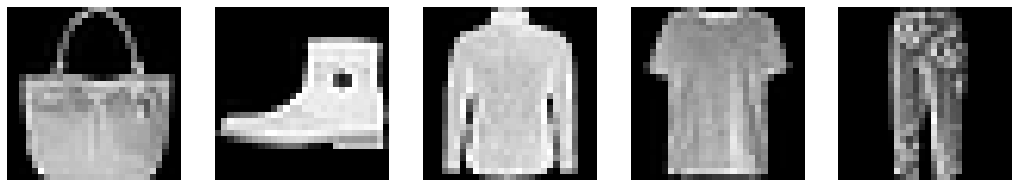

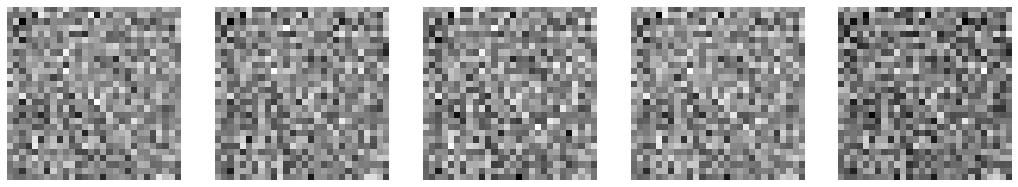

====> Epoch: 1 Average loss: 117.6202
====> Test set loss: 77.9176


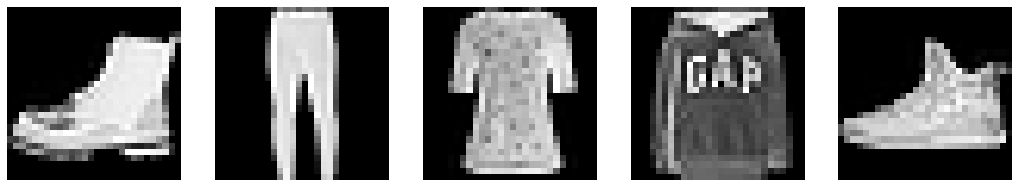

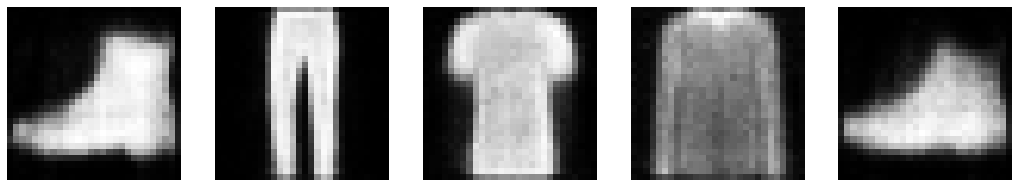

====> Epoch: 2 Average loss: 79.9781
====> Test set loss: 69.1129


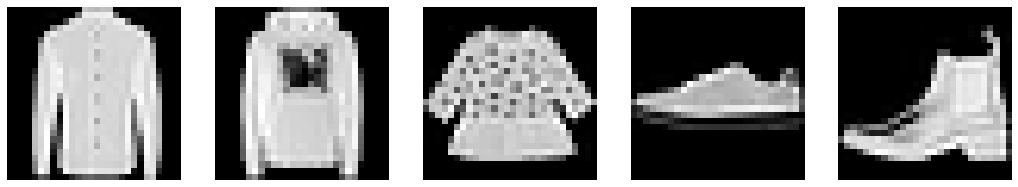

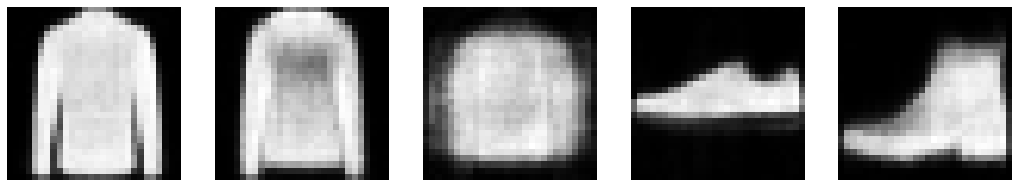

====> Epoch: 3 Average loss: 74.3866
====> Test set loss: 65.1371


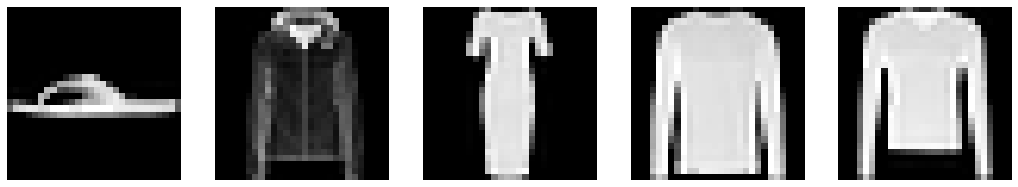

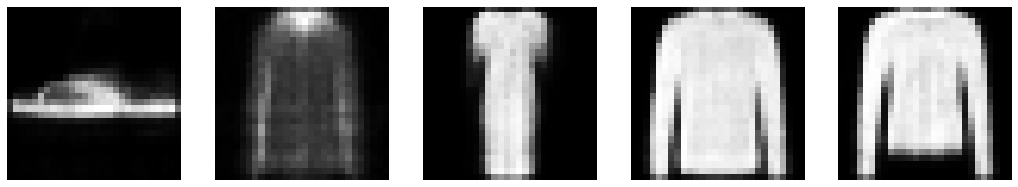

====> Epoch: 4 Average loss: 71.5816
====> Test set loss: 63.8123


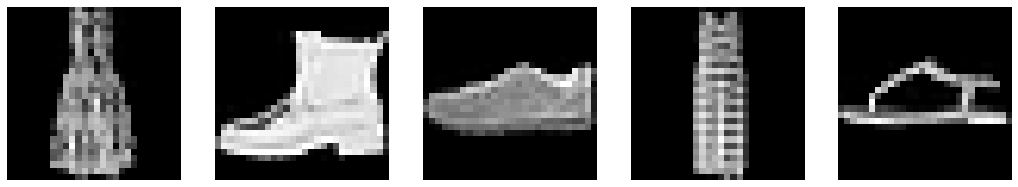

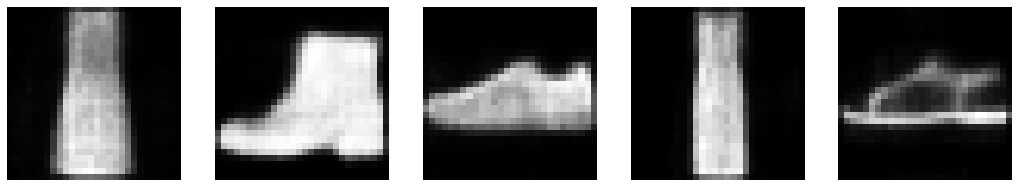

====> Epoch: 5 Average loss: 69.9463
====> Test set loss: 61.6984


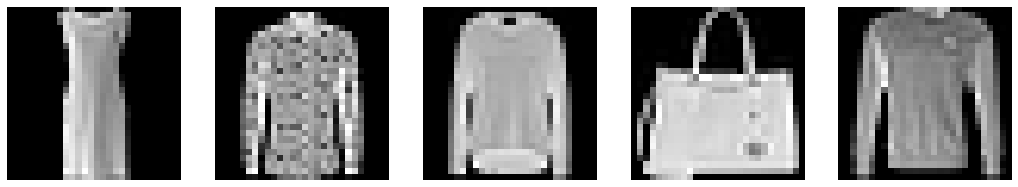

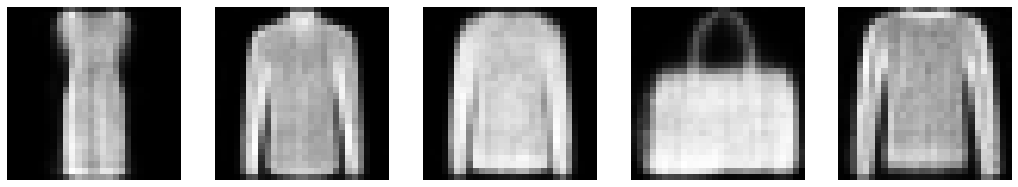

====> Epoch: 6 Average loss: 68.7604
====> Test set loss: 61.0719


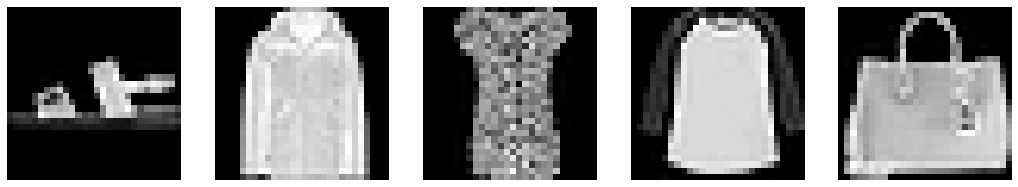

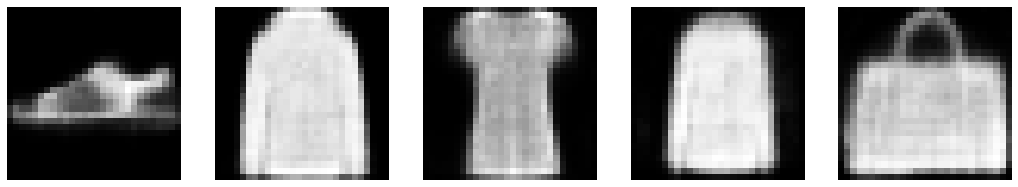

====> Epoch: 7 Average loss: 67.7994
====> Test set loss: 59.9461


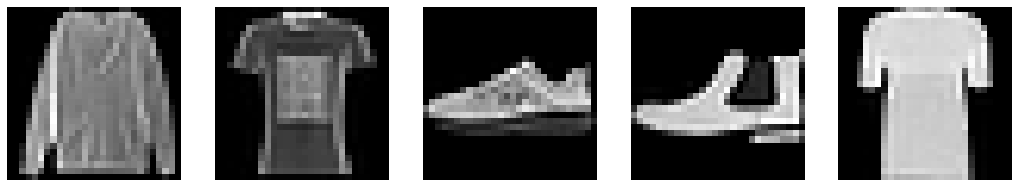

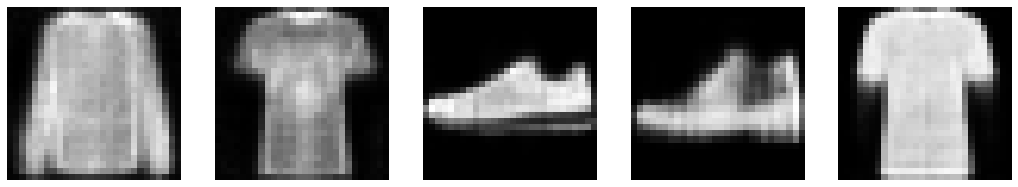

====> Epoch: 8 Average loss: 67.1315
====> Test set loss: 59.8084


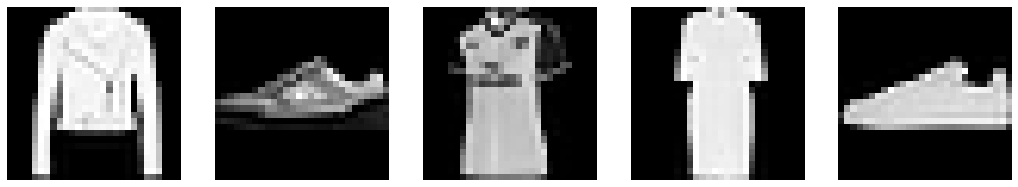

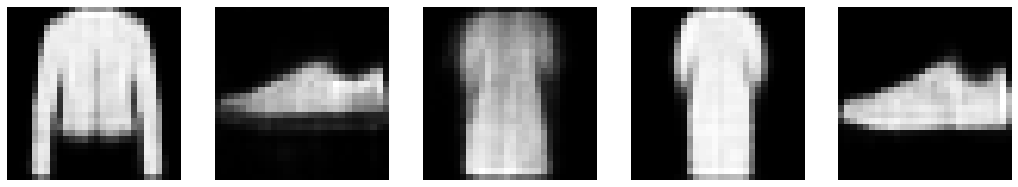

====> Epoch: 9 Average loss: 66.5448
====> Test set loss: 59.2915


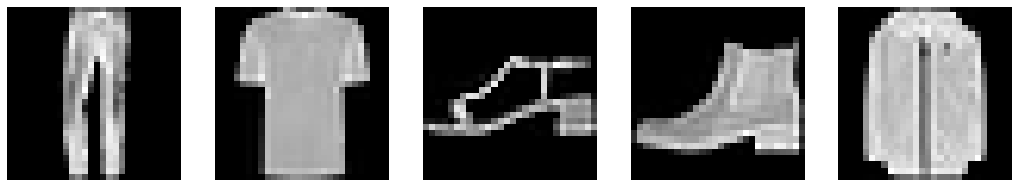

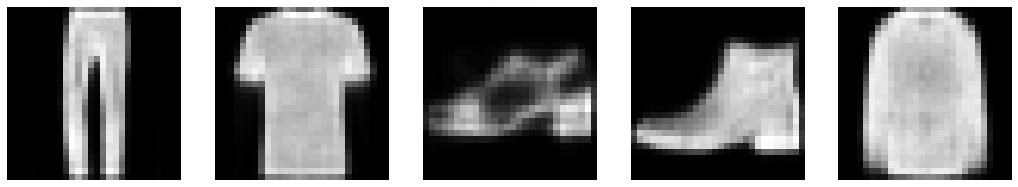

====> Epoch: 10 Average loss: 65.9716
====> Test set loss: 59.2769


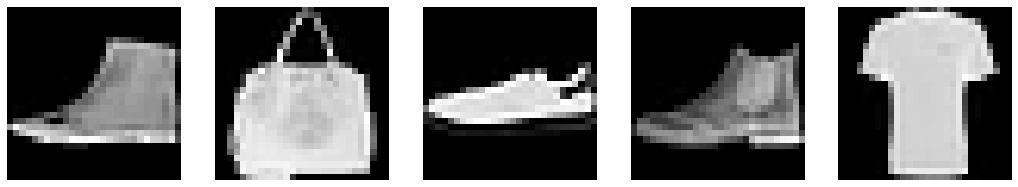

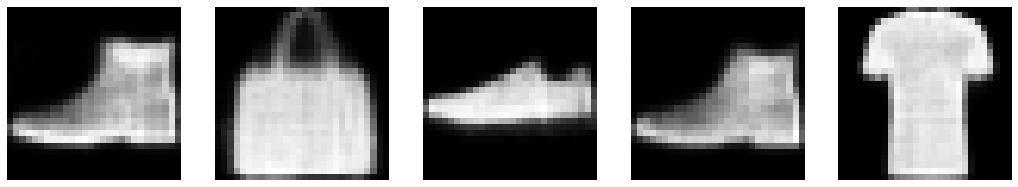

====> Epoch: 11 Average loss: 65.5609
====> Test set loss: 58.3791


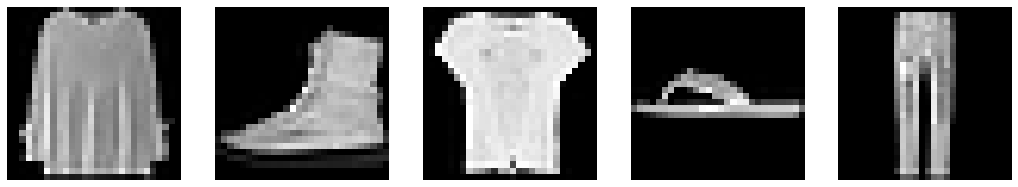

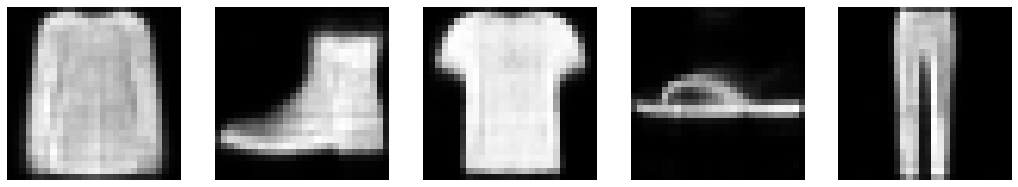

====> Epoch: 12 Average loss: 65.0992
====> Test set loss: 58.6813


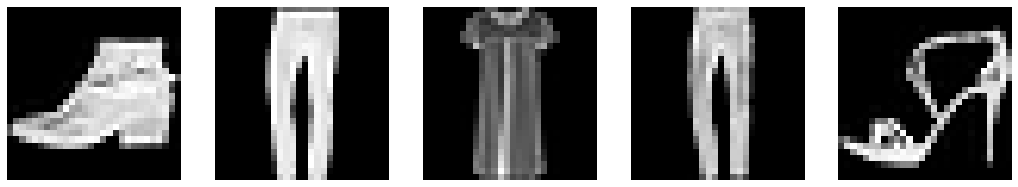

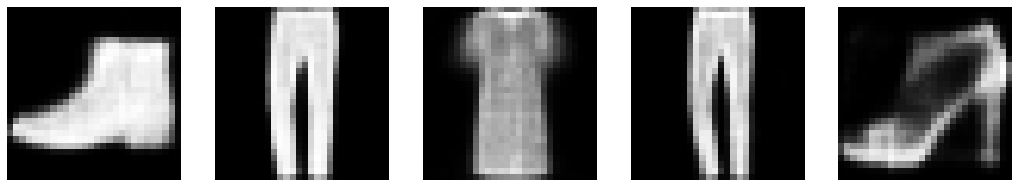

====> Epoch: 13 Average loss: 64.7936
====> Test set loss: 58.1414


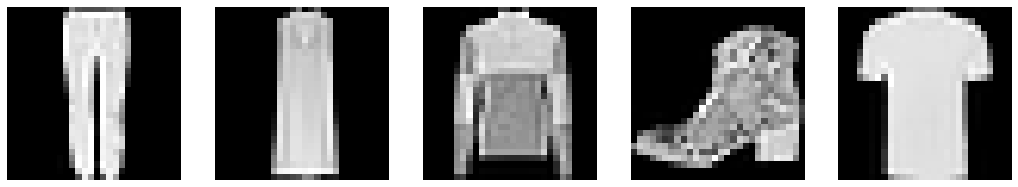

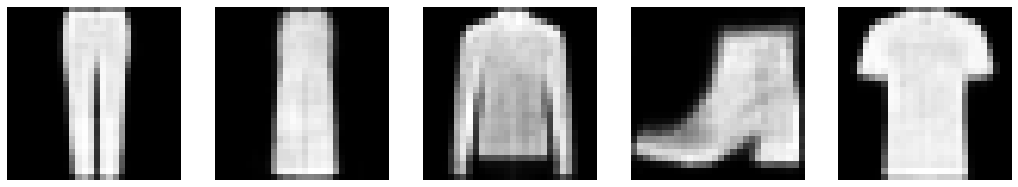

====> Epoch: 14 Average loss: 64.4036
====> Test set loss: 57.9342


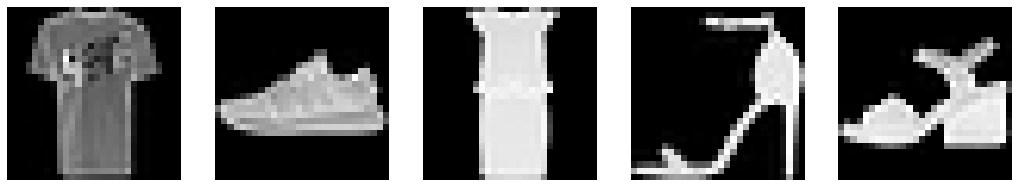

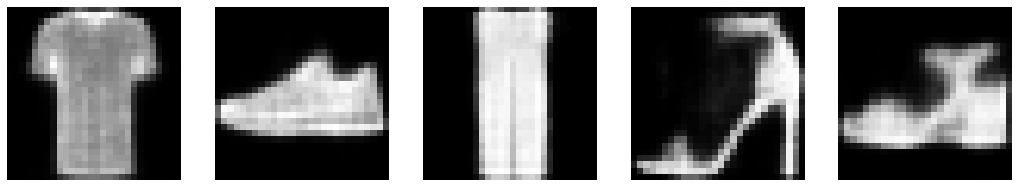

====> Epoch: 15 Average loss: 64.1609
====> Test set loss: 57.6888


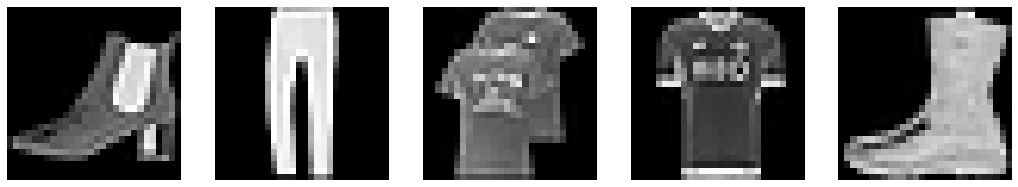

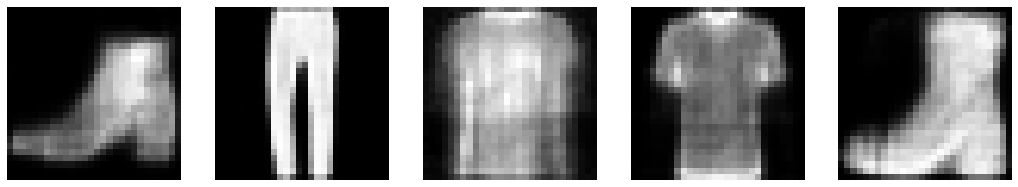

====> Epoch: 16 Average loss: 63.8822
====> Test set loss: 57.0012


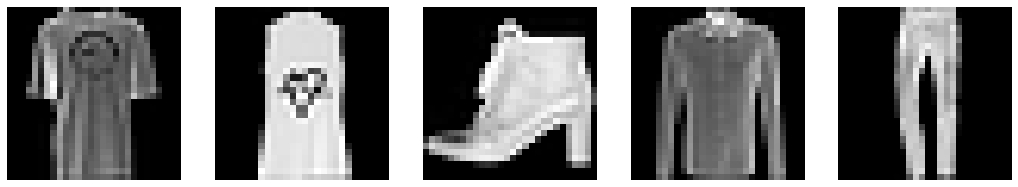

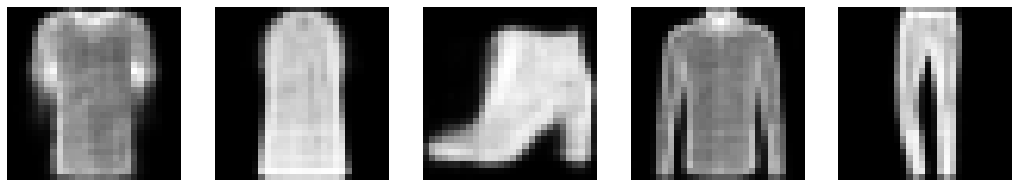

====> Epoch: 17 Average loss: 63.5895
====> Test set loss: 57.0187


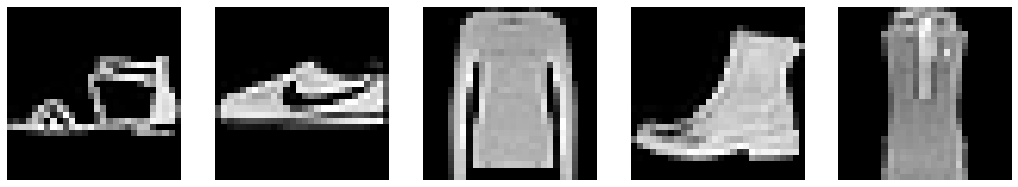

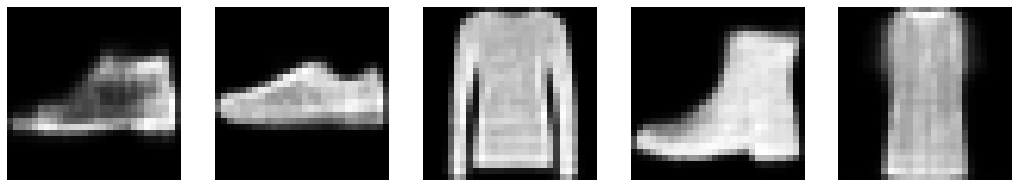

====> Epoch: 18 Average loss: 63.3814
====> Test set loss: 56.9122


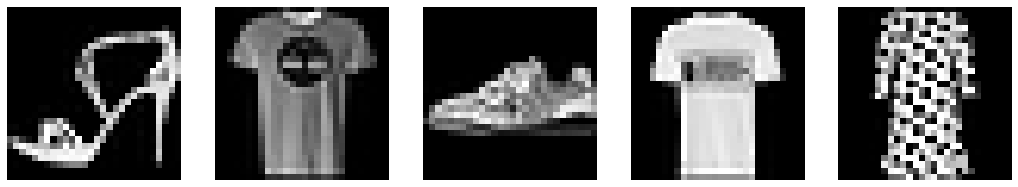

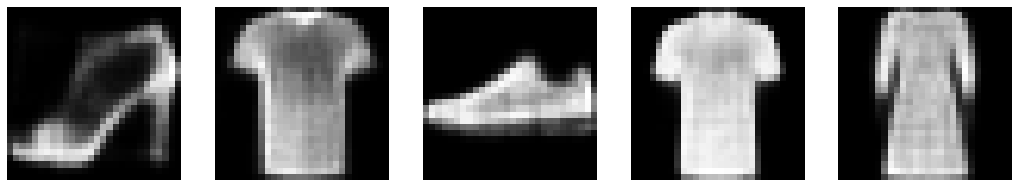

====> Epoch: 19 Average loss: 63.1438
====> Test set loss: 56.3041


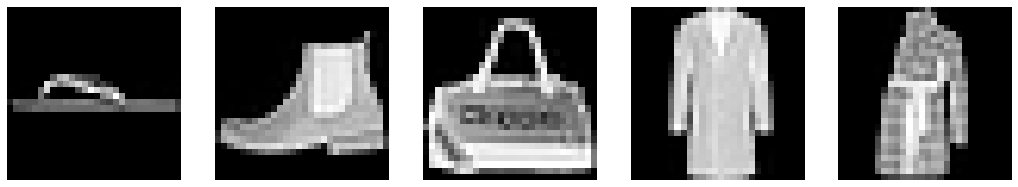

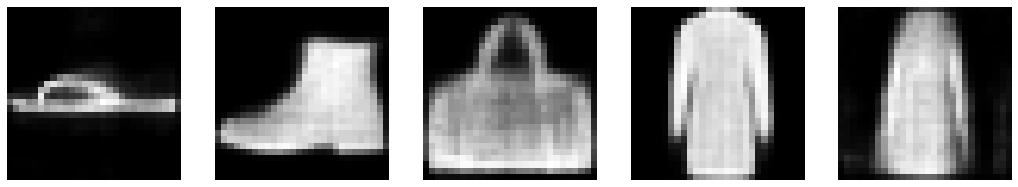

====> Epoch: 20 Average loss: 62.9965
====> Test set loss: 57.5314


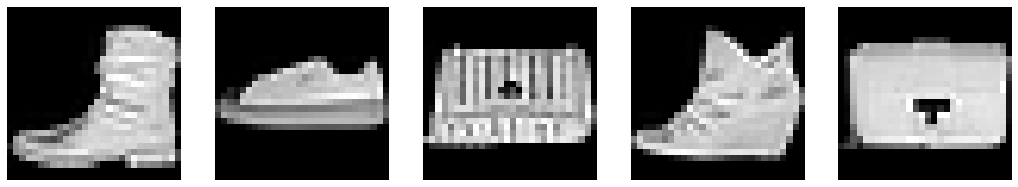

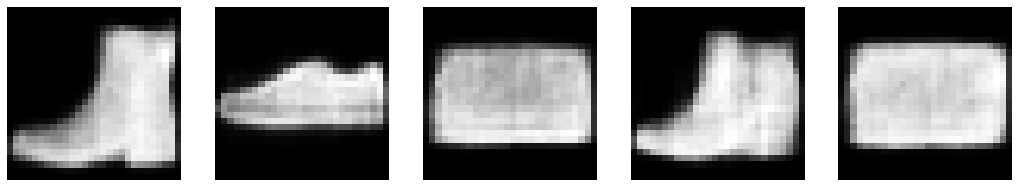

====> Epoch: 21 Average loss: 62.7961
====> Test set loss: 56.5755


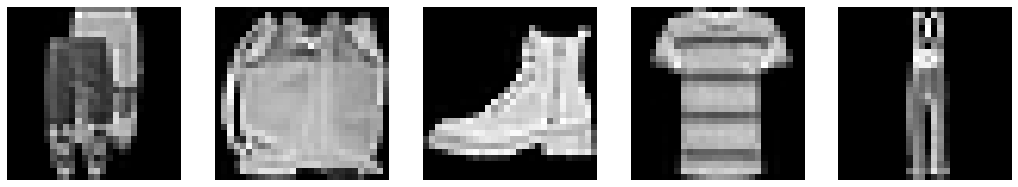

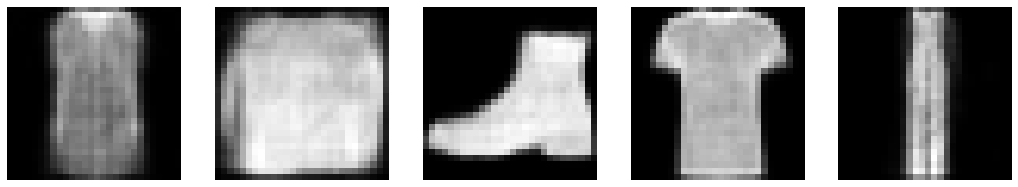

====> Epoch: 22 Average loss: 62.5777
====> Test set loss: 56.9421


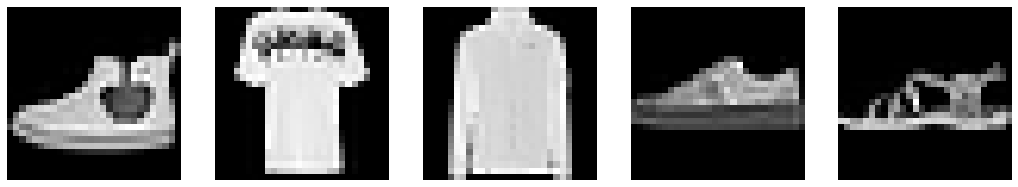

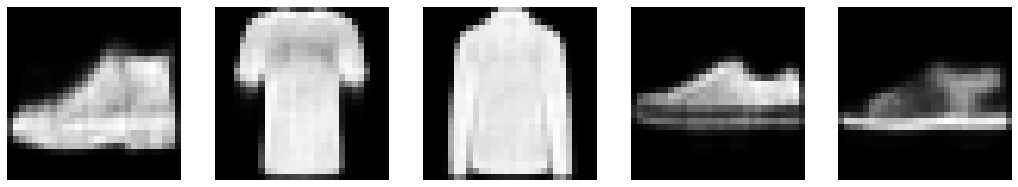

====> Epoch: 23 Average loss: 62.4212
====> Test set loss: 55.9162


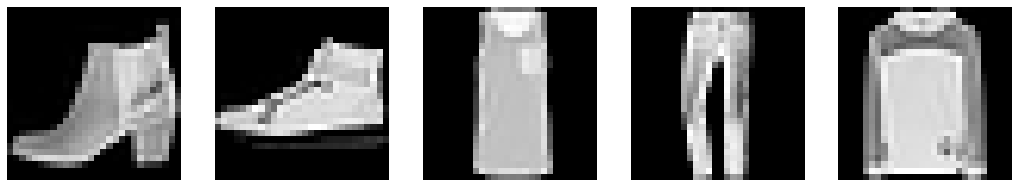

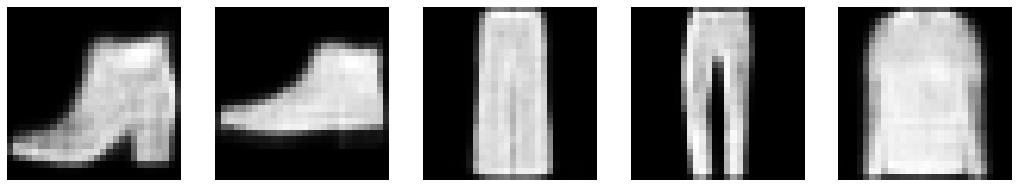

====> Epoch: 24 Average loss: 62.1763
====> Test set loss: 55.8340


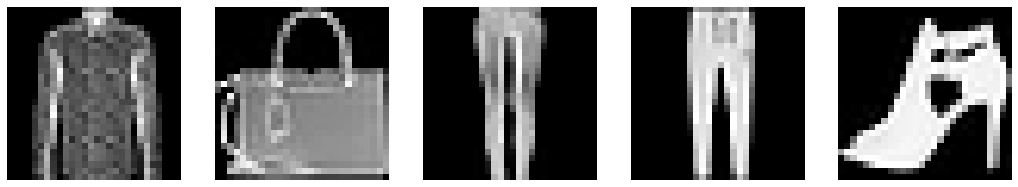

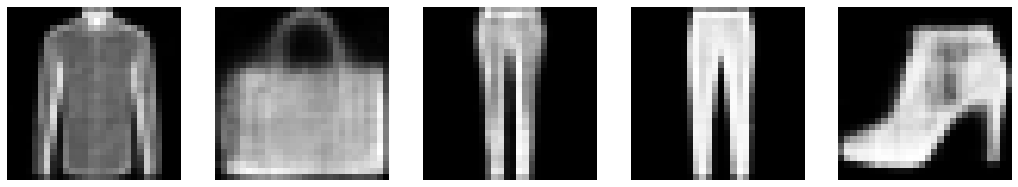

====> Epoch: 25 Average loss: 62.0526
====> Test set loss: 56.0894


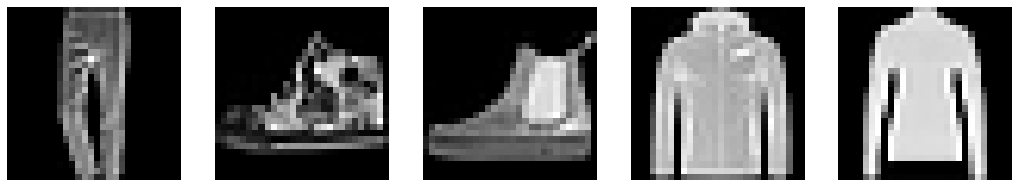

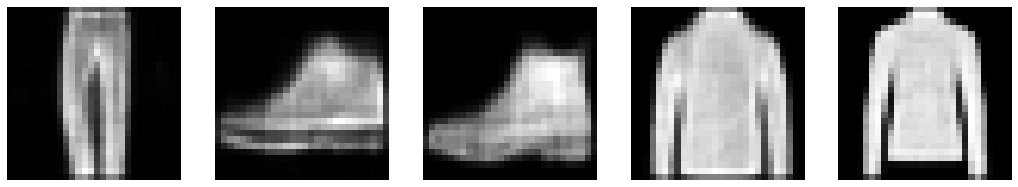

====> Epoch: 26 Average loss: 62.0105
====> Test set loss: 55.2732


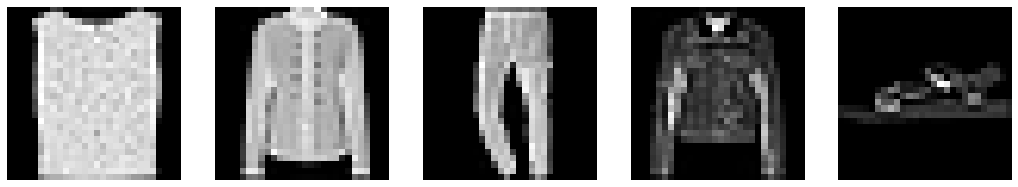

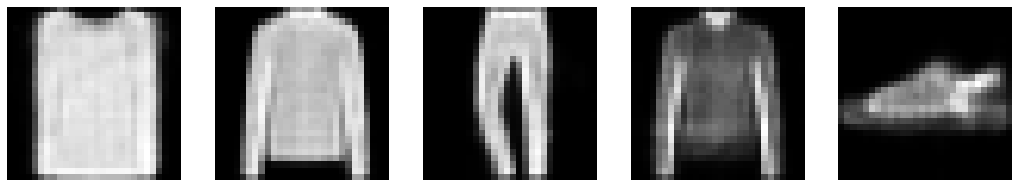

====> Epoch: 27 Average loss: 61.8897
====> Test set loss: 55.8550


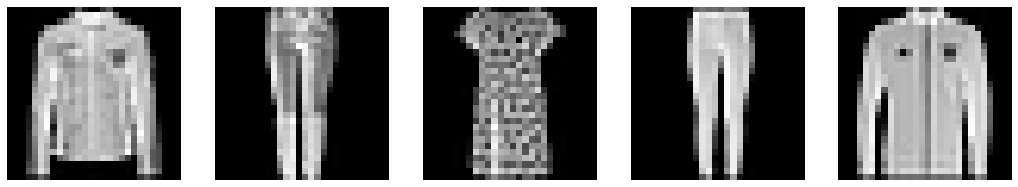

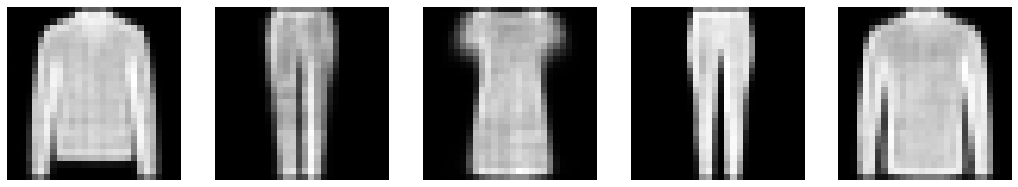

====> Epoch: 28 Average loss: 61.7849
====> Test set loss: 55.5481


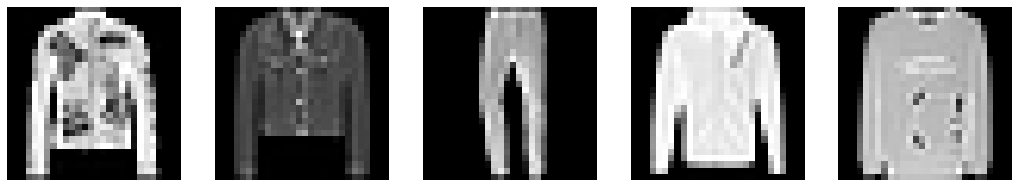

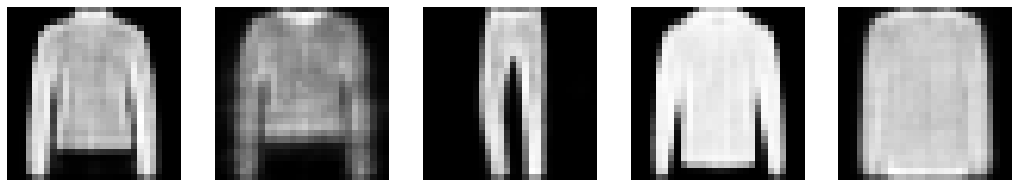

====> Epoch: 29 Average loss: 61.6138
====> Test set loss: 55.5030


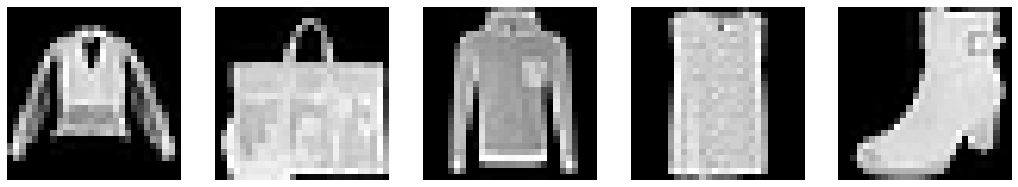

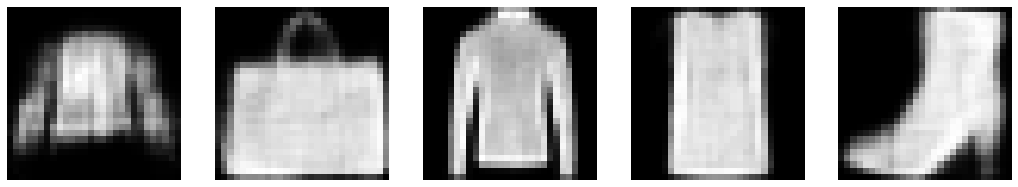

====> Epoch: 30 Average loss: 61.4924
====> Test set loss: 54.8558


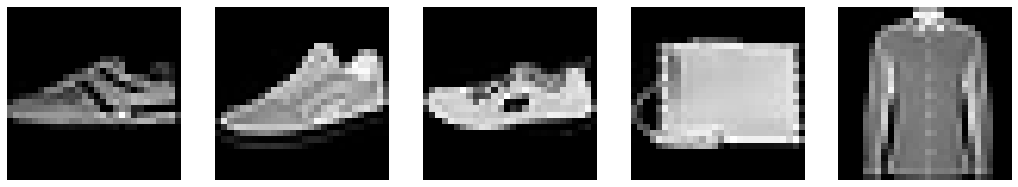

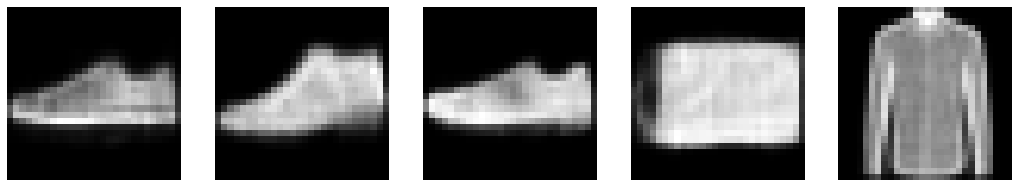

====> Epoch: 31 Average loss: 61.3452
====> Test set loss: 55.7439


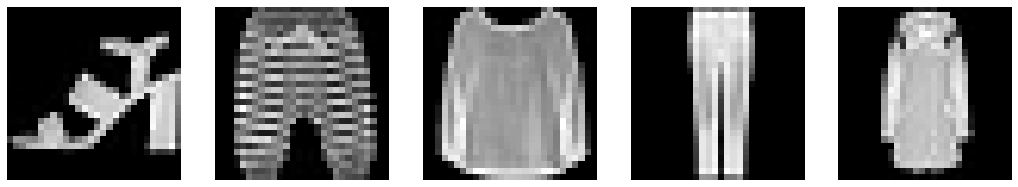

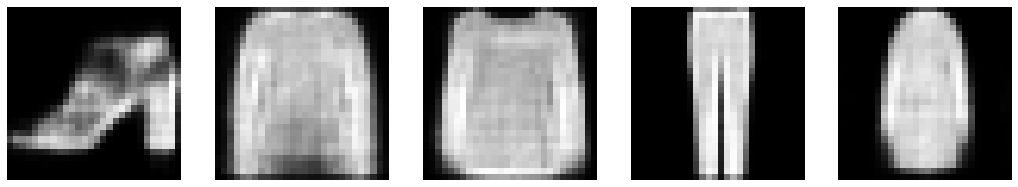

====> Epoch: 32 Average loss: 61.2685
====> Test set loss: 54.5658


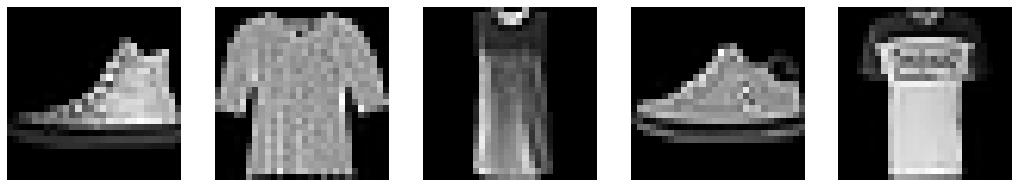

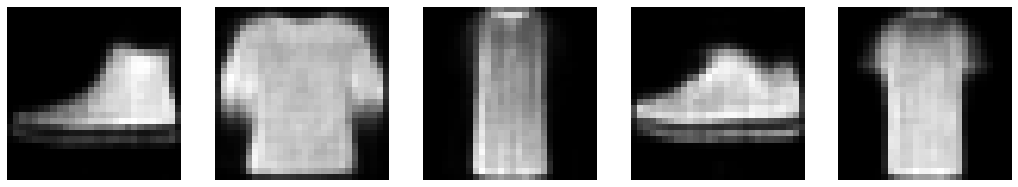

====> Epoch: 33 Average loss: 61.1748
====> Test set loss: 55.3072


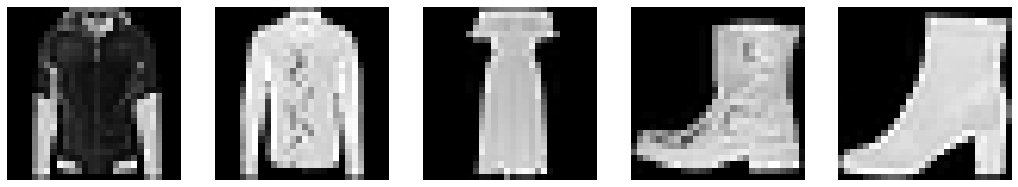

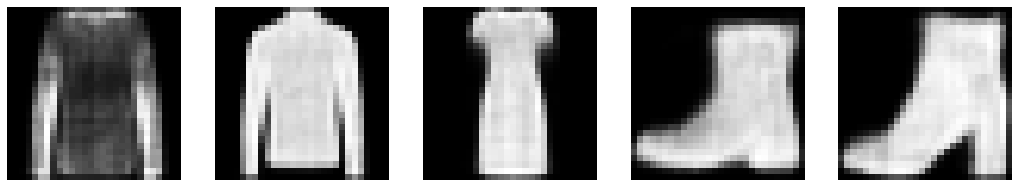

====> Epoch: 34 Average loss: 61.1391
====> Test set loss: 54.9724


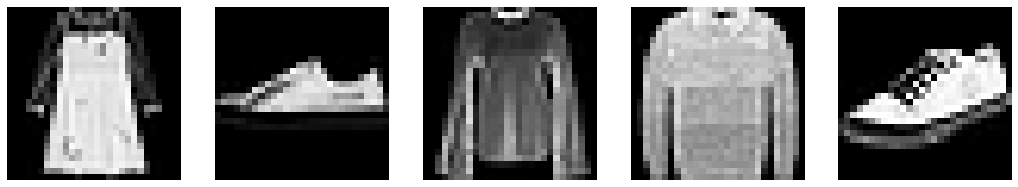

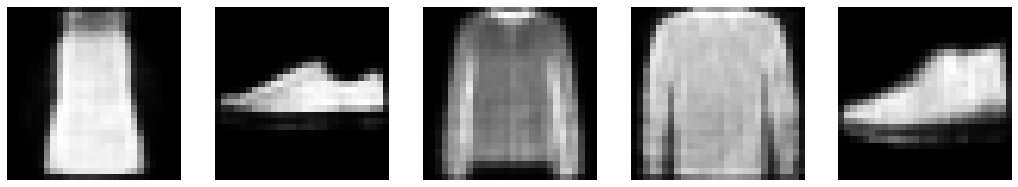

====> Epoch: 35 Average loss: 61.0249
====> Test set loss: 55.7023


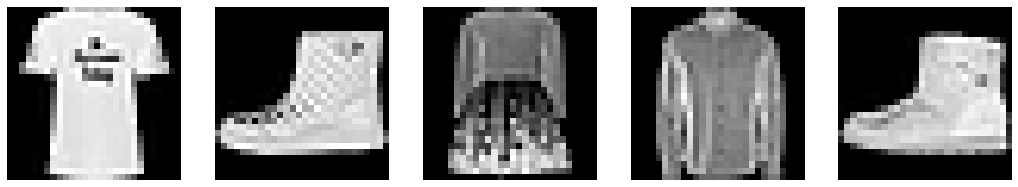

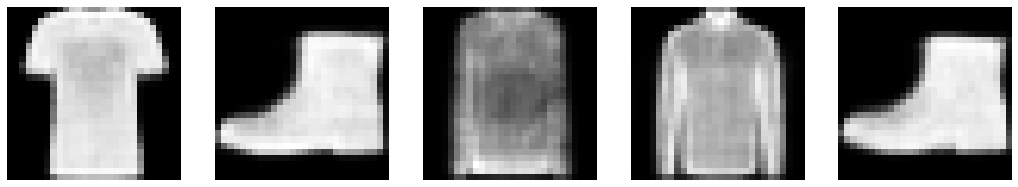

====> Epoch: 36 Average loss: 60.9605
====> Test set loss: 54.8260


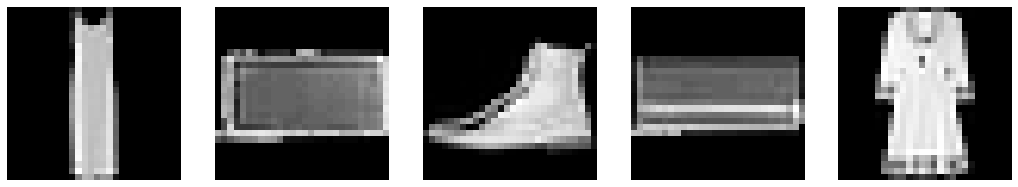

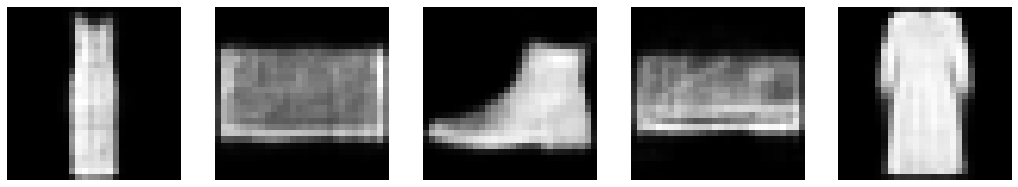

====> Epoch: 37 Average loss: 60.8476
====> Test set loss: 54.7925


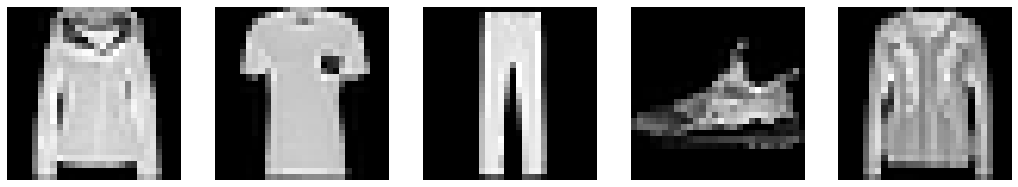

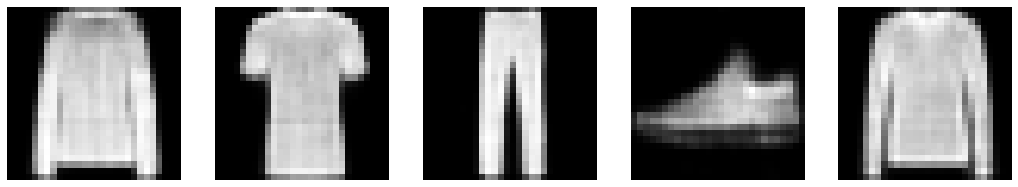

====> Epoch: 38 Average loss: 60.7637
====> Test set loss: 55.2005


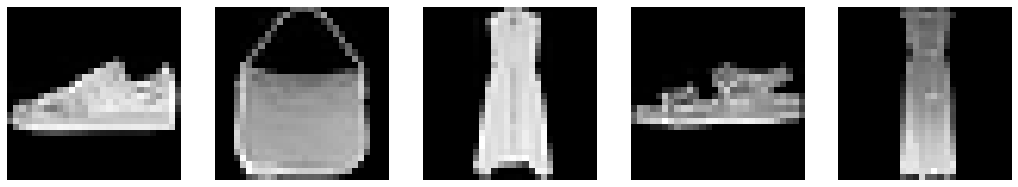

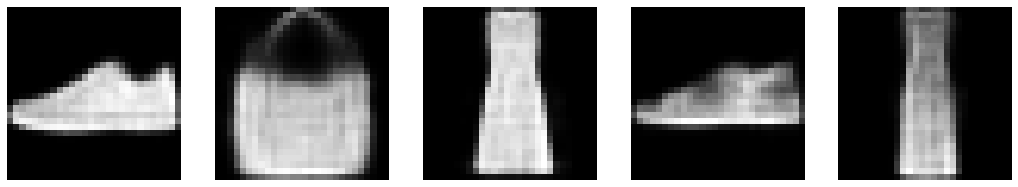

====> Epoch: 39 Average loss: 60.7221
====> Test set loss: 54.5837


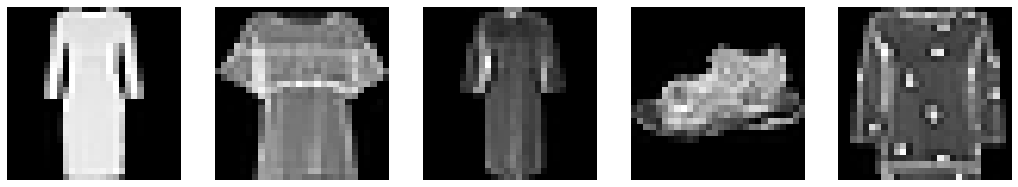

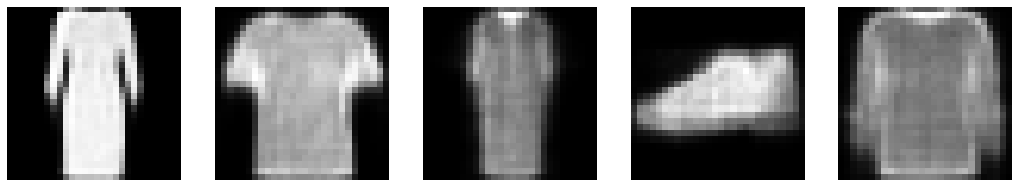

====> Epoch: 40 Average loss: 60.6705
====> Test set loss: 55.1288


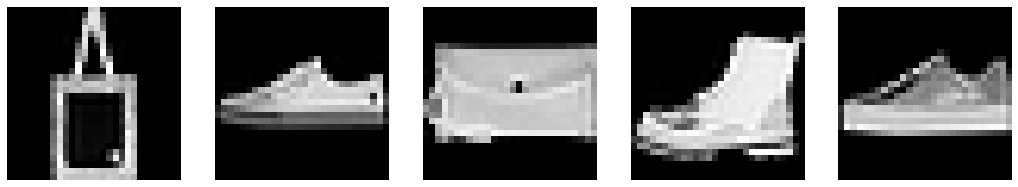

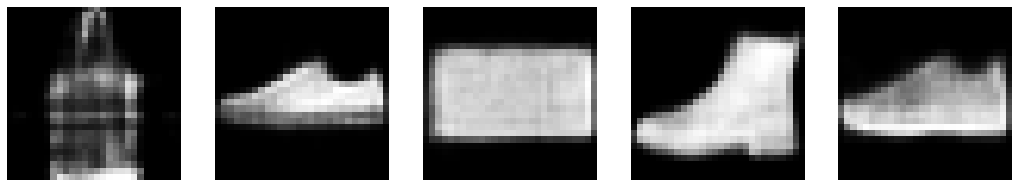

====> Epoch: 41 Average loss: 60.5950
====> Test set loss: 54.4526


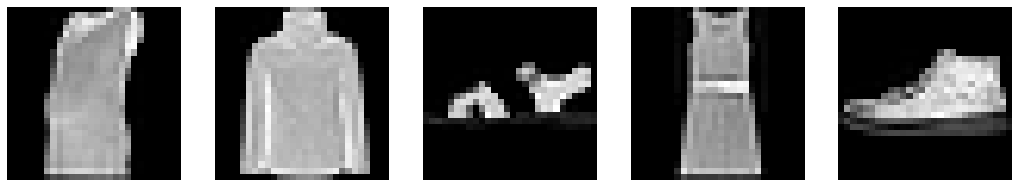

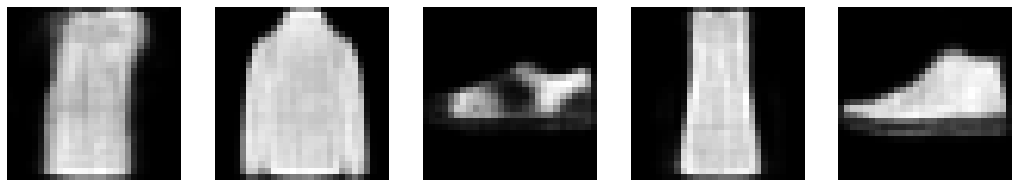

====> Epoch: 42 Average loss: 60.5368
====> Test set loss: 54.2388


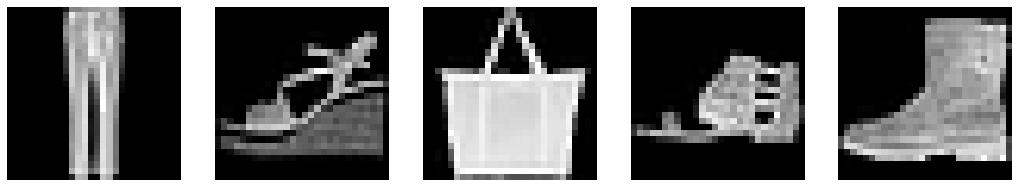

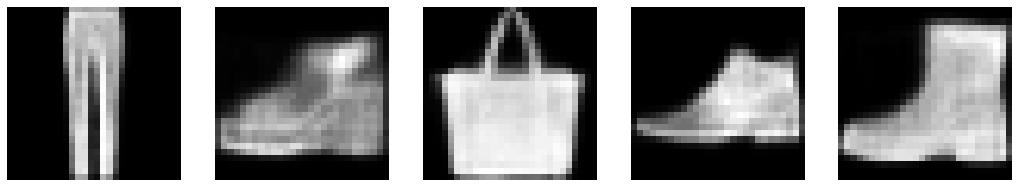

====> Epoch: 43 Average loss: 60.4484
====> Test set loss: 54.4737


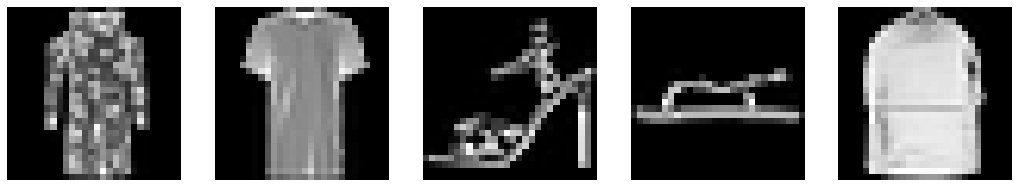

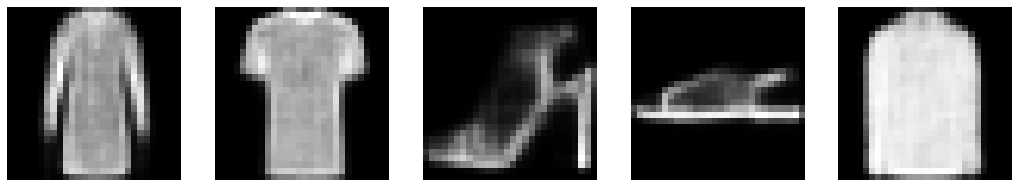

====> Epoch: 44 Average loss: 60.3719
====> Test set loss: 54.6098


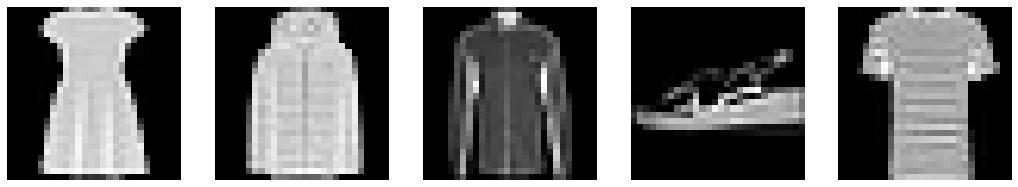

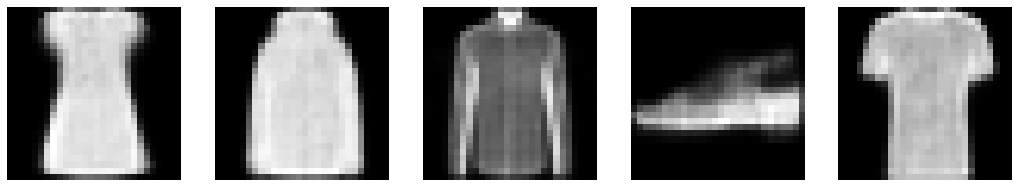

====> Epoch: 45 Average loss: 60.3434
====> Test set loss: 54.0875


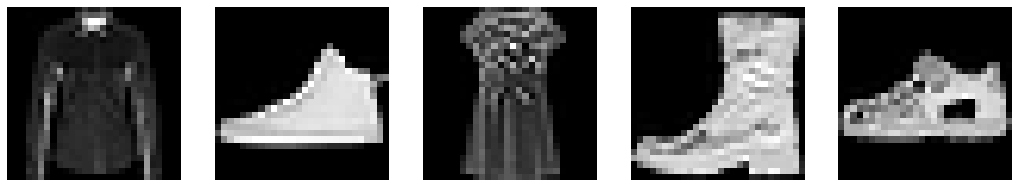

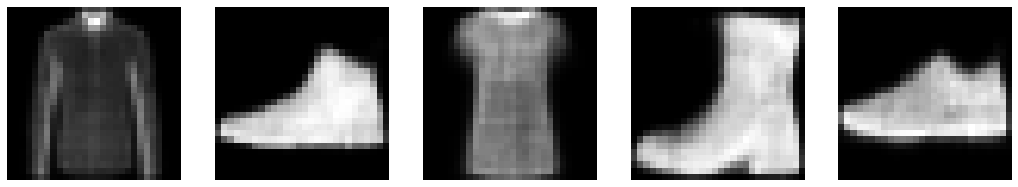

====> Epoch: 46 Average loss: 60.2636
====> Test set loss: 54.7702


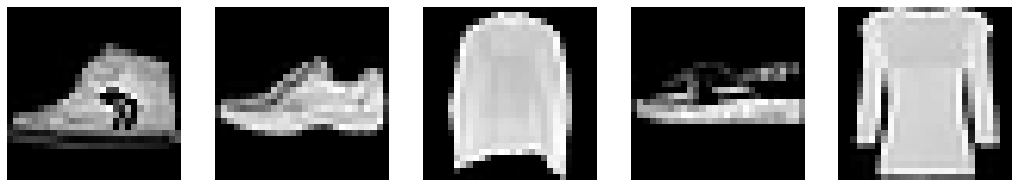

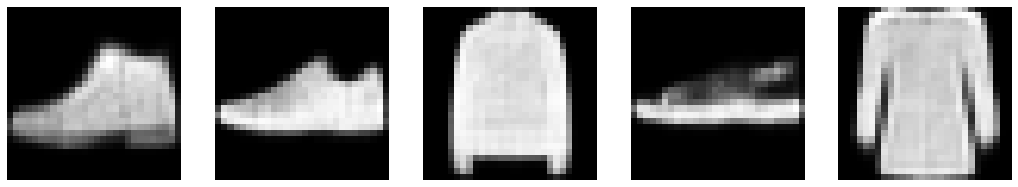

====> Epoch: 47 Average loss: 60.1997
====> Test set loss: 54.9048


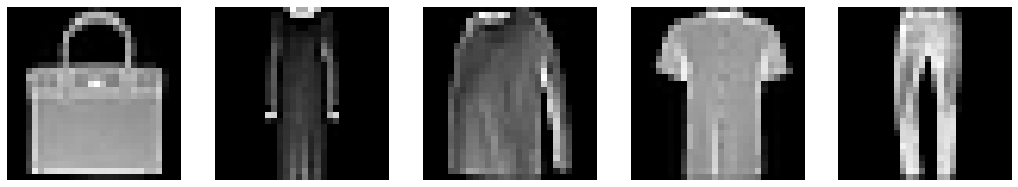

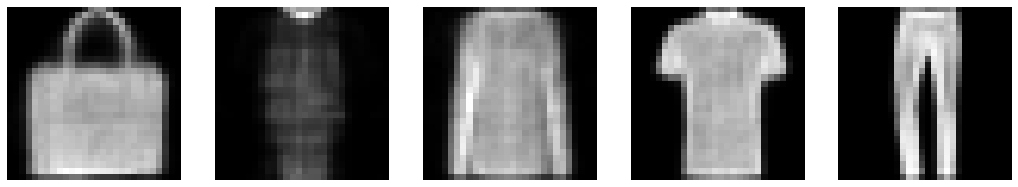

====> Epoch: 48 Average loss: 60.1721
====> Test set loss: 54.8571


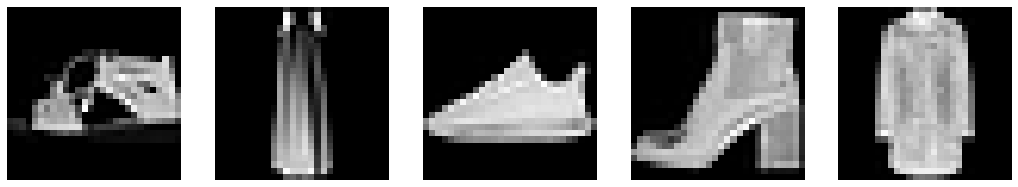

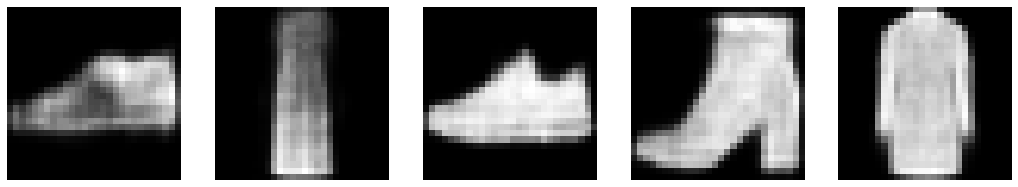

====> Epoch: 49 Average loss: 60.1451
====> Test set loss: 54.3046


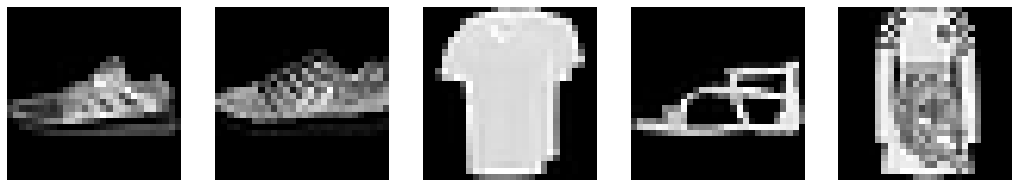

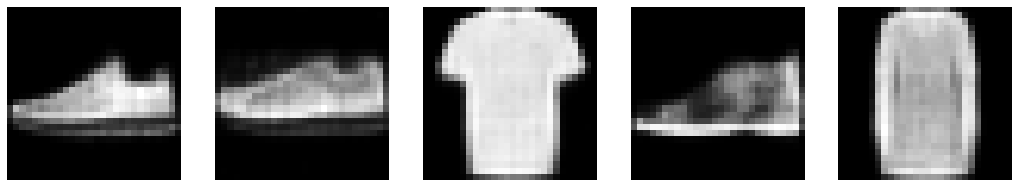

====> Epoch: 50 Average loss: 60.0565
====> Test set loss: 54.4295


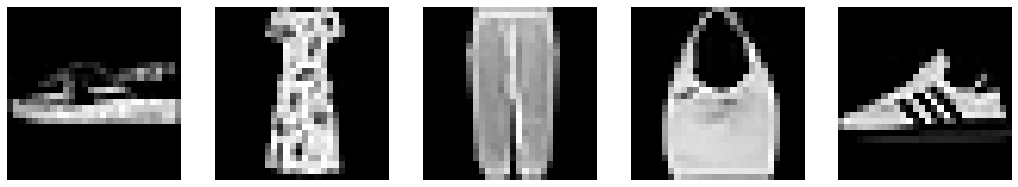

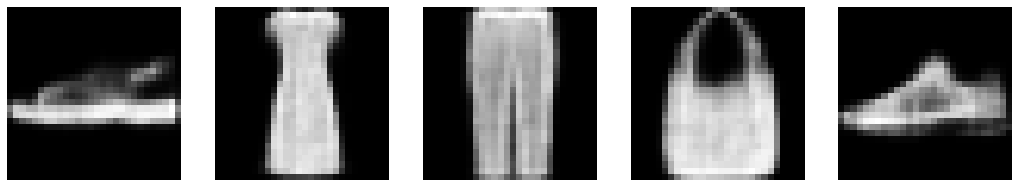

In [15]:
latent_dim=20
model = VAE(latent_dim).to(device)

# Setting the optimiser
learning_rate = 1e-3
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

epochs = 50
codes = dict(mu=list(), logσ2=list(), y=list())
for epoch in range(0, epochs + 1):
    # Training
    if epoch > 0:  # test untrained net first
        model.train()
        train_loss = 0
        for x, _ in train_loader:
            x = x.to(device)
            # ===================forward=====================
            x_hat, mu, logvar = model(x)
            loss = loss_function(x_hat, x, mu, logvar)
            train_loss += loss.item()
            # ===================backward====================
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # ===================log========================
        print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')
    
    # Testing
    means, logvars, labels = list(), list(), list()
    with torch.no_grad():
        model.eval()
        test_loss = 0
        for x, y in test_loader:
            x = x.to(device)
            # ===================forward=====================
            x_hat, mu, logvar = model(x)
            test_loss += loss_function(x_hat, x, mu, logvar).item()
            # =====================log=======================
            means.append(mu.detach())
            logvars.append(logvar.detach())
            labels.append(y.detach())
    # ===================log========================
    codes['mu'].append(torch.cat(means))
    codes['logσ2'].append(torch.cat(logvars))
    codes['y'].append(torch.cat(labels))
    test_loss /= len(test_loader.dataset)
    print(f'====> Test set loss: {test_loss:.4f}')
    display_images(x, x_hat, 5)

# Transitions between two images

example  1 , pair of images:




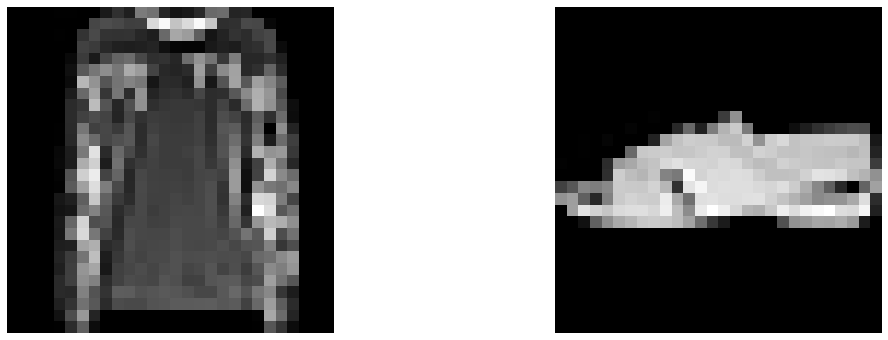

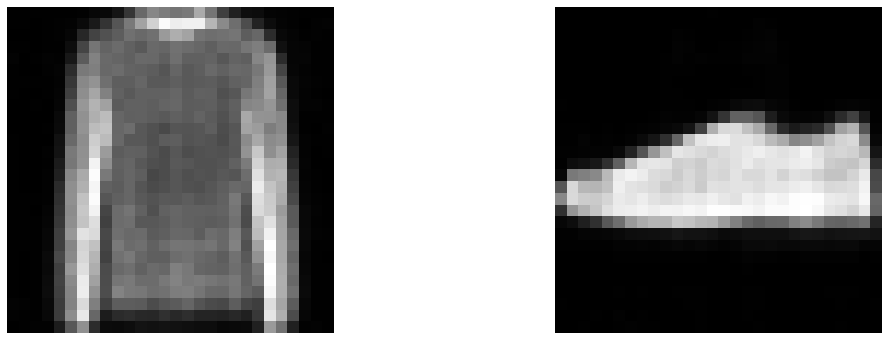

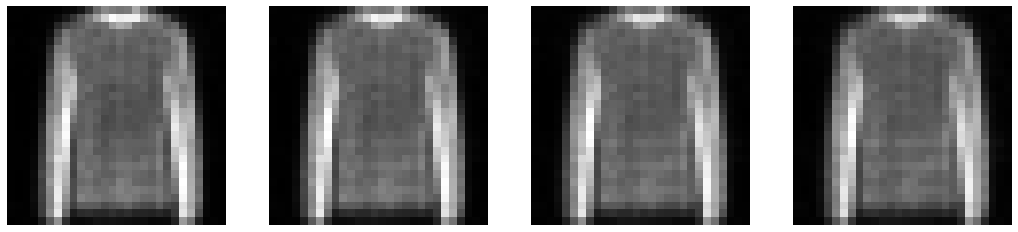

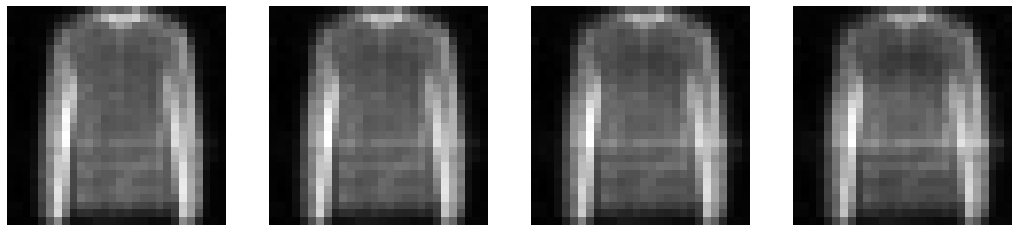

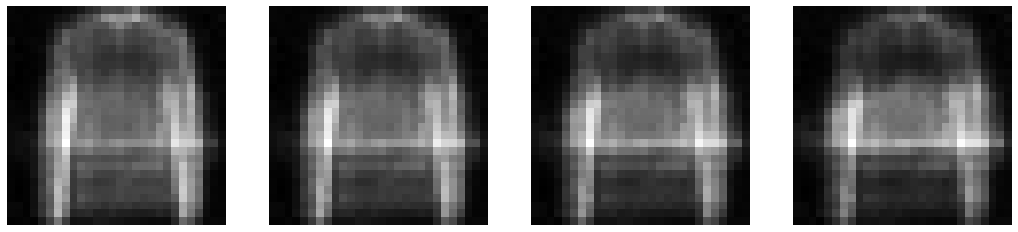

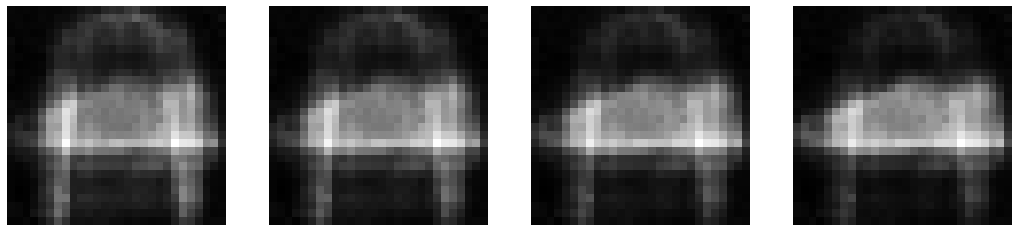

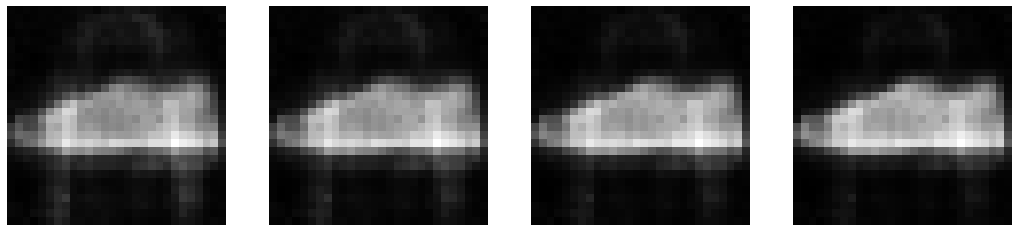

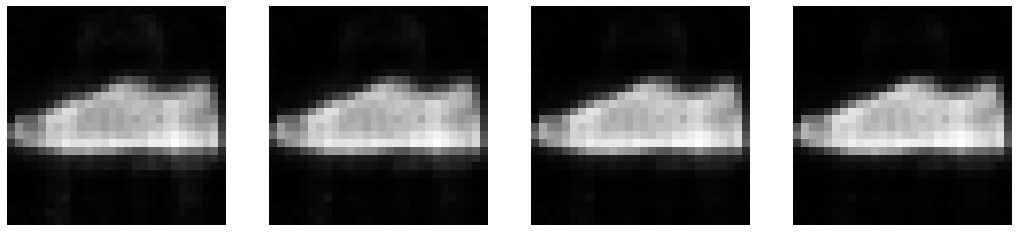

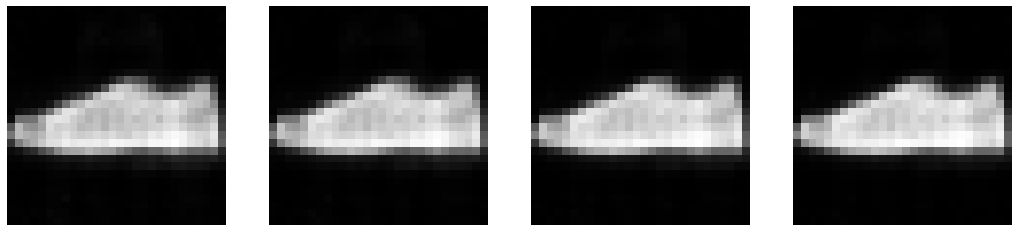

example  2 , pair of images:




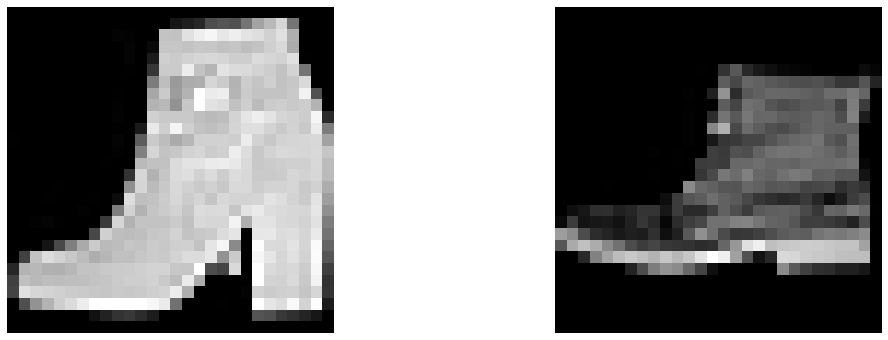

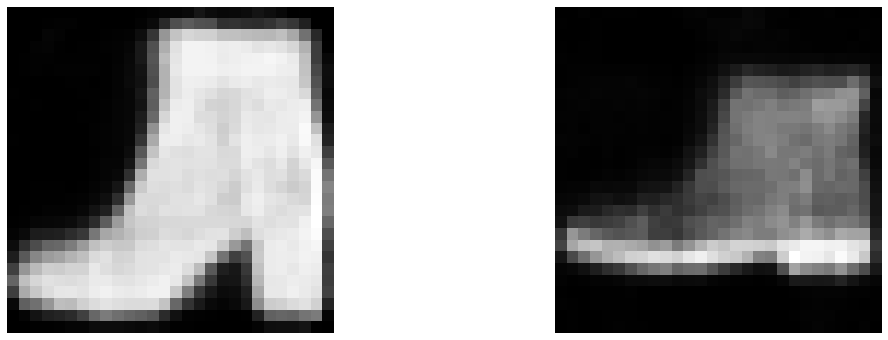

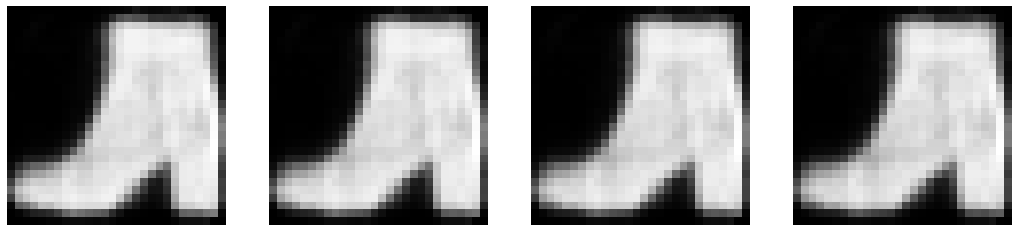

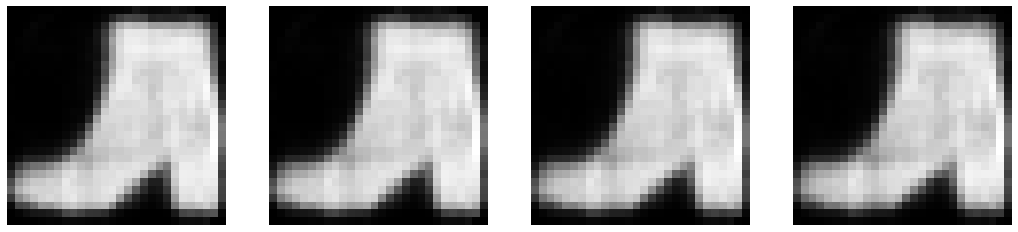

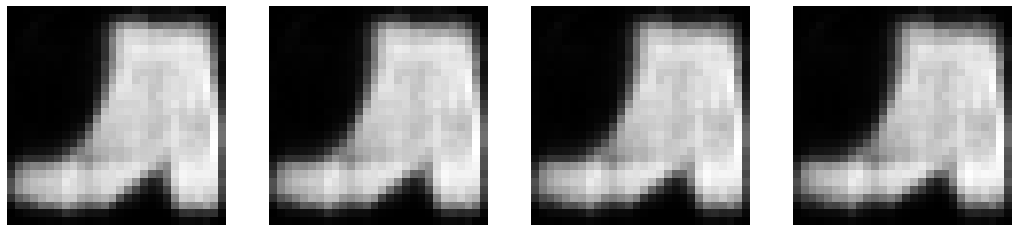

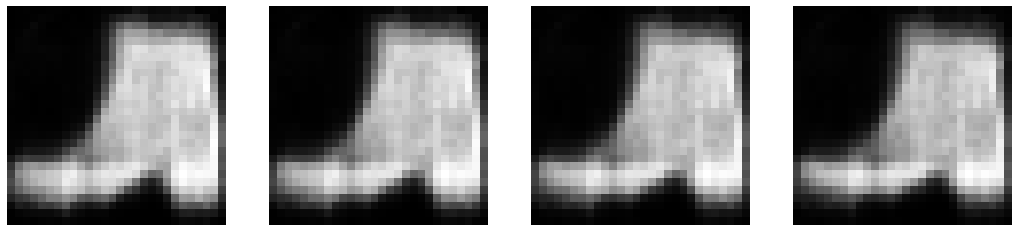

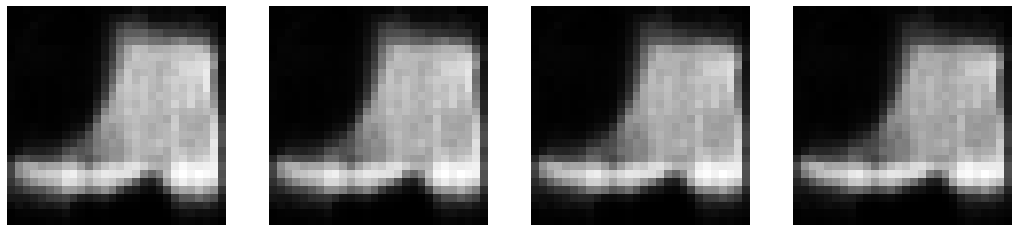

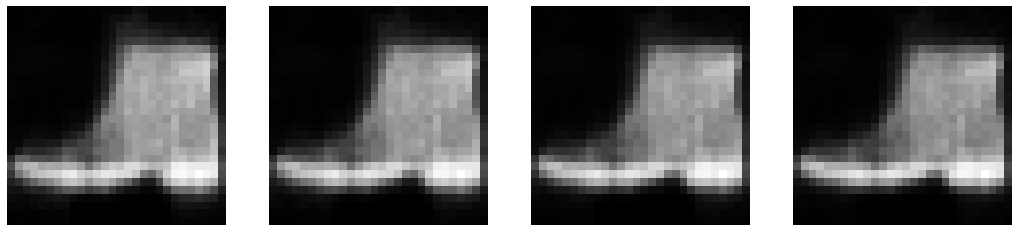

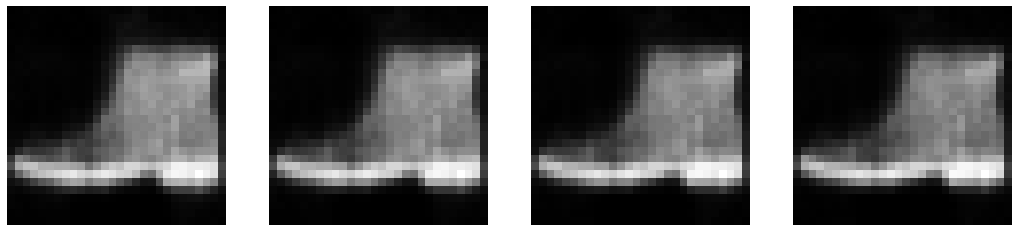

example  3 , pair of images:




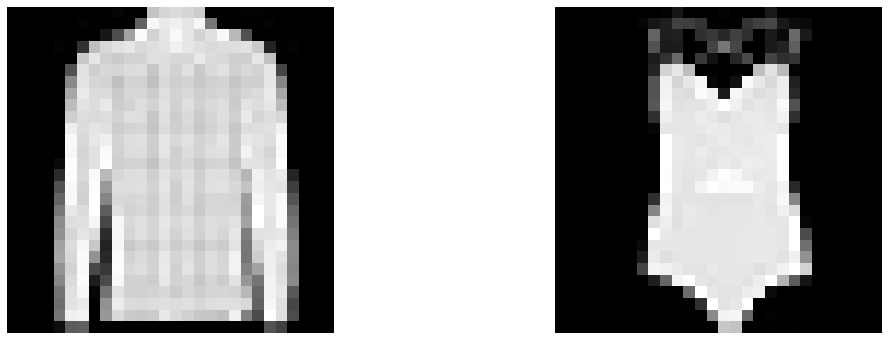

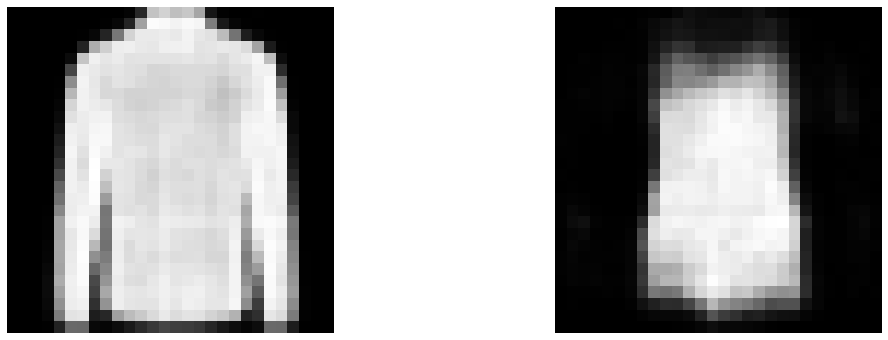

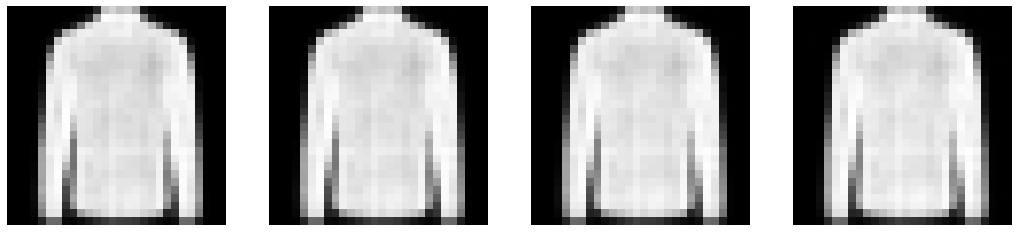

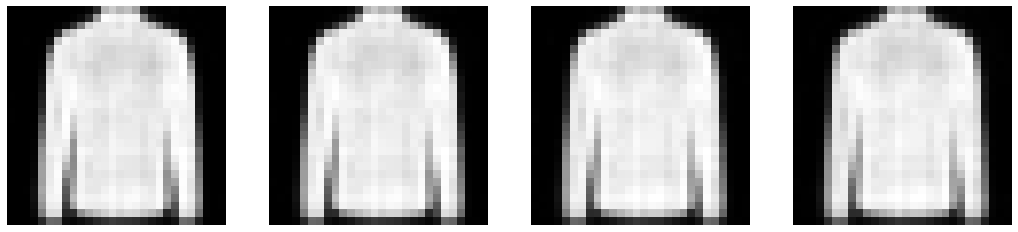

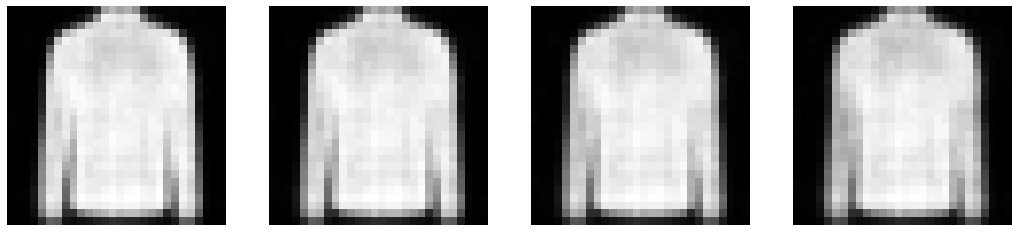

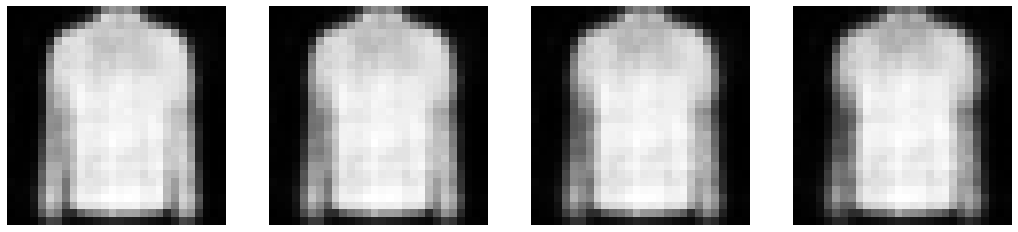

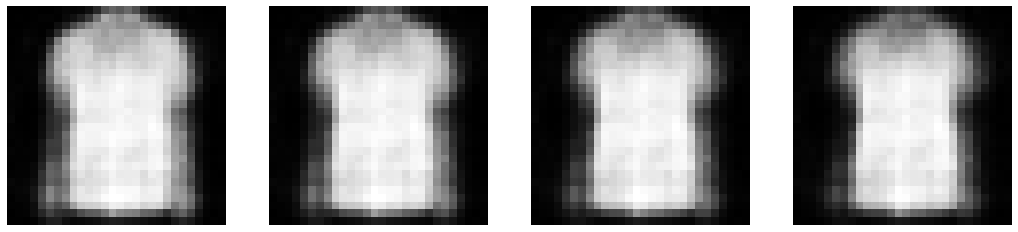

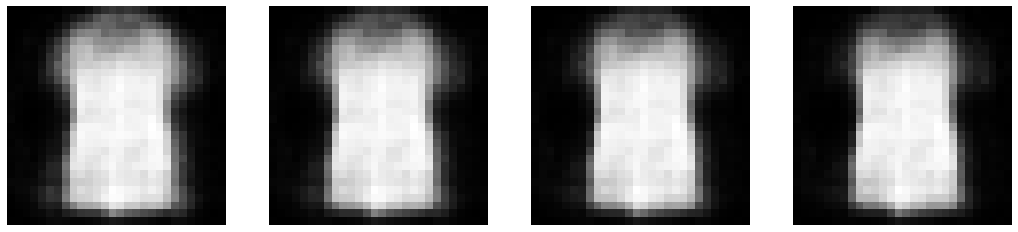

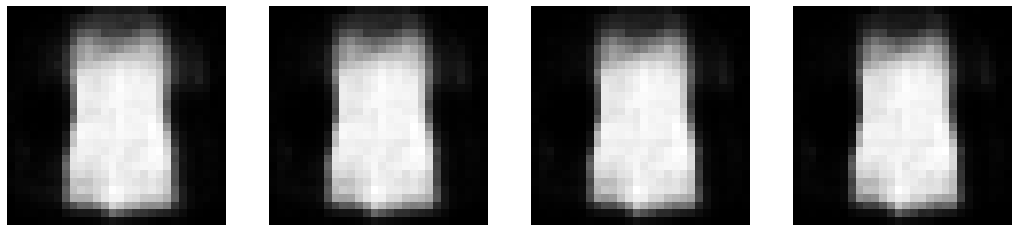

example  4 , pair of images:




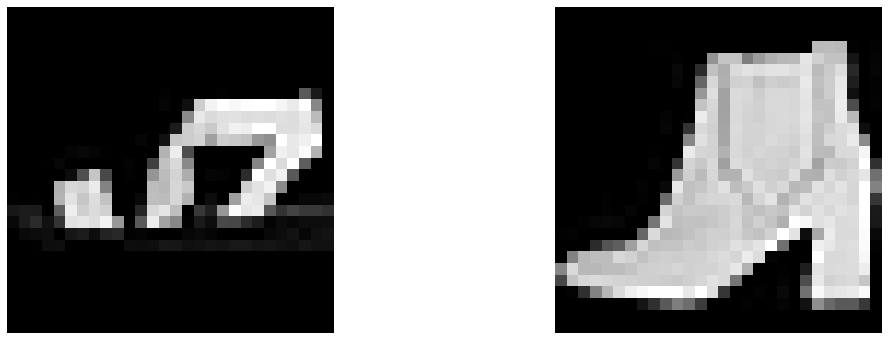

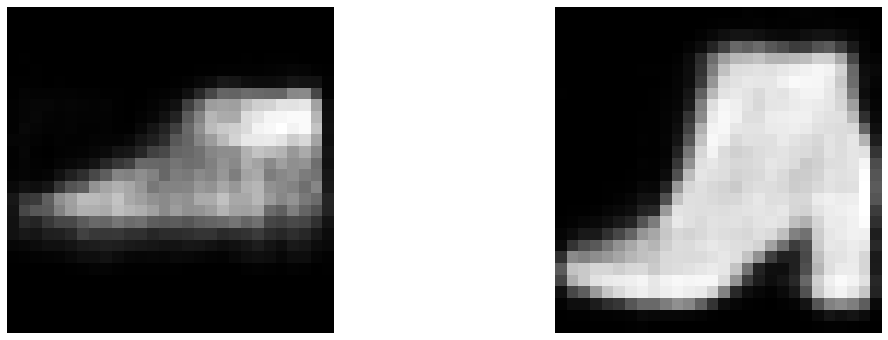

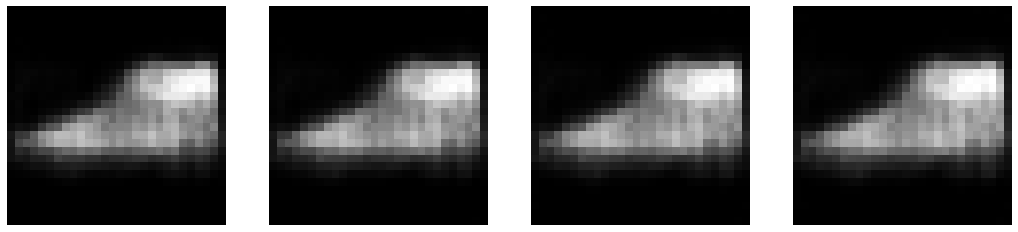

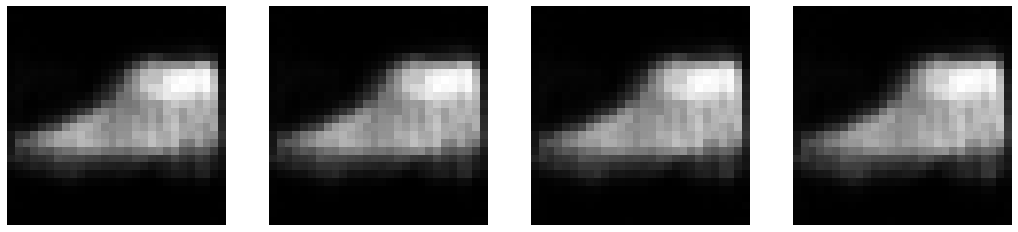

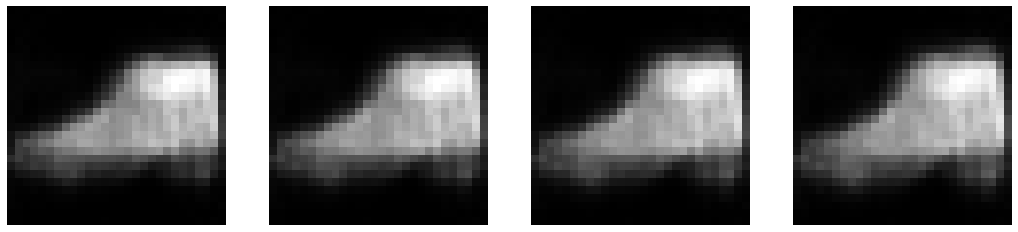

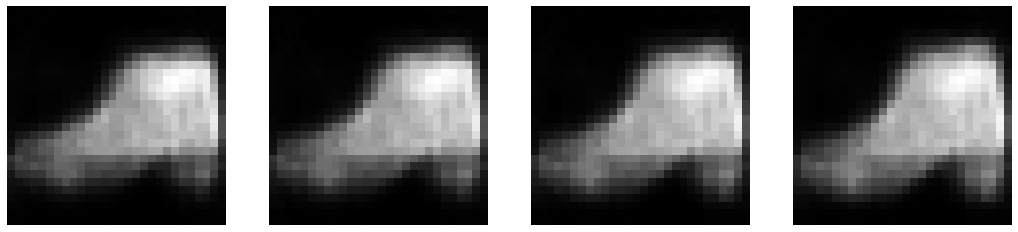

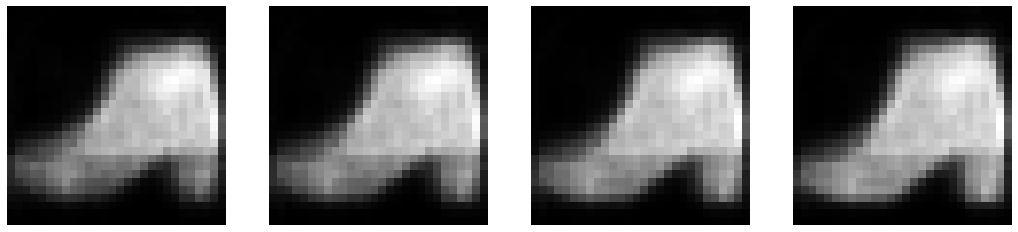

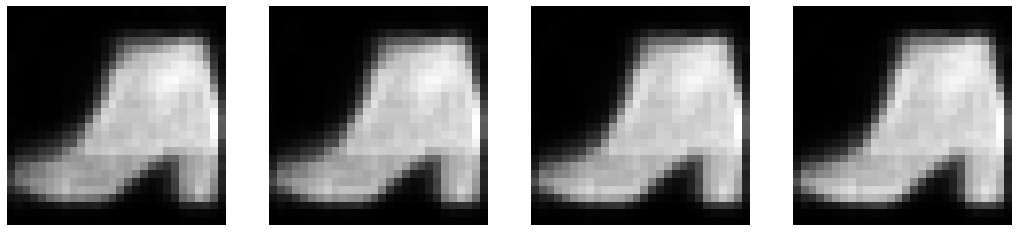

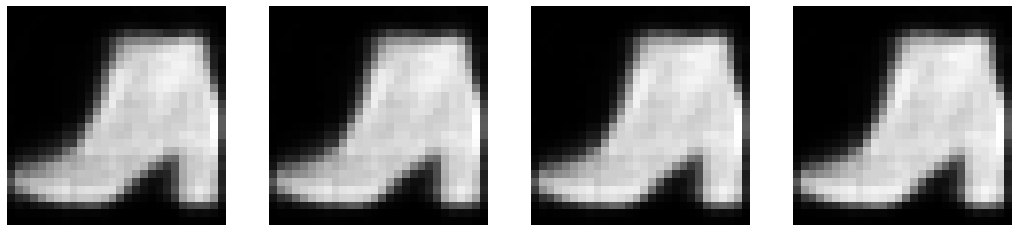

example  5 , pair of images:




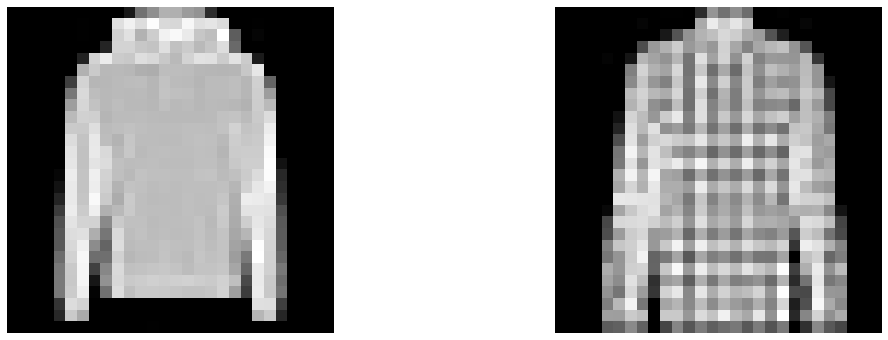

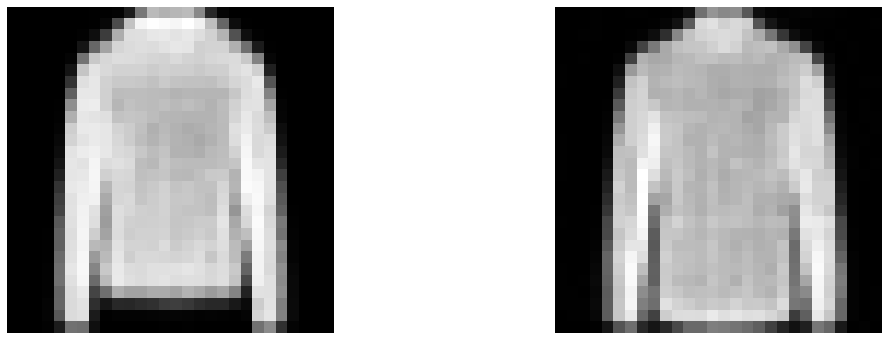

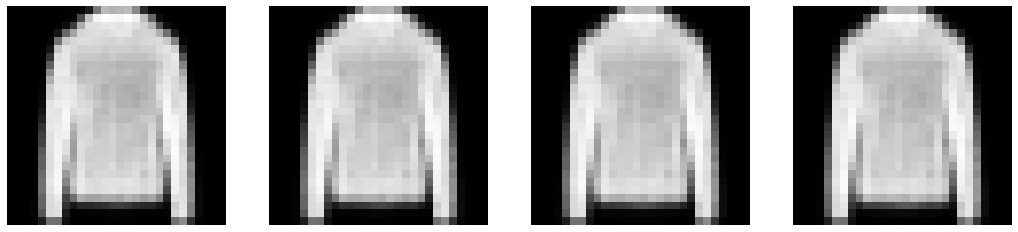

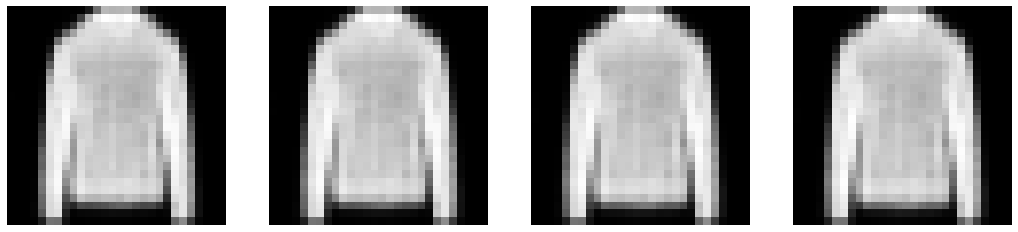

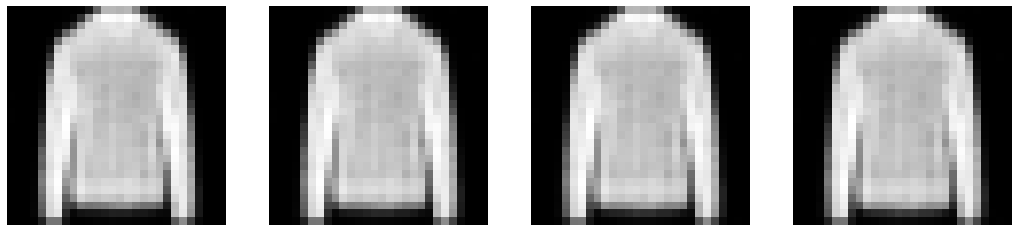

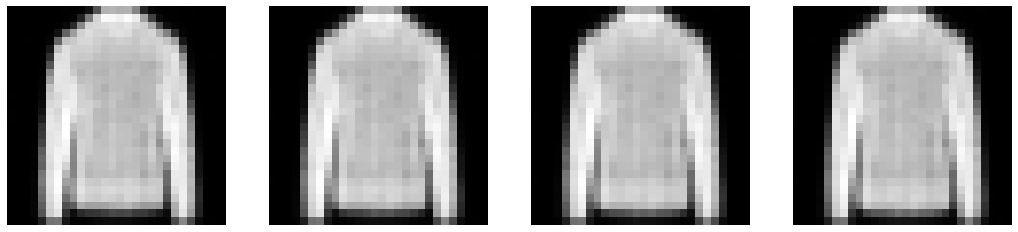

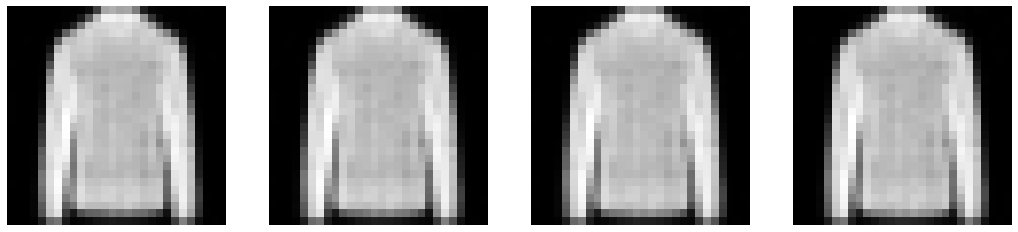

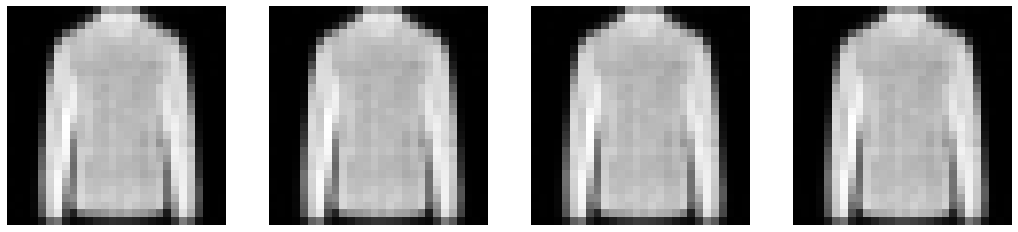

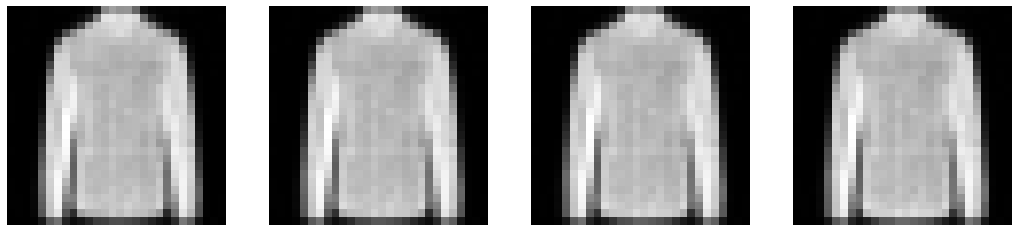

In [14]:
#sample = torch.stack((x_hat[A].data, x_hat[B].data), 0)
for i in range(5):
  print("example ",i+1,", pair of images:\n\n")
  x, _ = next(iter(test_loader))
  x = x.to(device)
  x_hat, mu, logvar = model(x)
  A, B = 10, 30
  sample = model.decoder(torch.stack((mu[A].data, mu[B].data), 0))
  display_images(None, torch.stack(((
      x[A].data.view(-1),
      x[B].data.view(-1)
  )), 0), 2)
  display_images(None, torch.stack(((
      sample.data[0],
      sample.data[1]
  )), 0), 2)
  # Perform an interpolation between input A and B, in N steps
  N = 30
  code = torch.Tensor(N, latent_dim).to(device)
  sample = torch.Tensor(N, 28, 28).to(device)
  for i in range(N):
      code[i] = i / (N - 1) * mu[B].data + (1 - i / (N - 1) ) * mu[A].data
      # sample[i] = i / (N - 1) * x[B].data + (1 - i / (N - 1) ) * x[A].data
  img_set = model.decoder(code)
  for i in range(N//4):
      display_images(None, img_set[i*4:4*(i+1)], 4)
